# Final analysis and plotting of data
- uses data/analysis_yield_expt_summary.xlsx
- extract yield values considering information which runs to take (and leaving out specific points in the fit etc)

In [1]:
#!pip install cremerlab-utils
import sys, os
#sys.path.insert(0, os.path.expanduser('~/.local/lib/python3.8/site-packages'))
import glob 
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import collections
import builtins

#import cremerlab.hplc
#load required pacakges (as always)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as spi
from scipy.integrate import odeint #this is the module to solve ODEs


import met_brewer

%matplotlib inline
# Load the scipy module/
import scipy.stats 
import json

import csv
from collections import defaultdict
from pprint import pprint



################################
#load information of species to include
#################################
#load species information for all characterized species
speciesinformation=pd.read_csv("data_hplc/species_properties.csv",skiprows=1)
display(speciesinformation.head())

species_HPLCname                       species  \
0       B.vulgatus          Phocaeicola vulgatus   
1       B.fragilis          Bacteroides fragilis   
2         B.ovatus            Bacteroides ovatus   
3          B.theta  Bacteroides thetaiotaomicron   
4          P.copri              Prevotella copri   

                    new_species                     species.1 species_short  \
0          Phocaeicola vulgatus          Bacteroides vulgatus   B. vulgatus   
1          Bacteroides fragilis          Bacteroides fragilis   B. fragilis   
2            Bacteroides ovatus            Bacteroides ovatus     B. ovatus   
3  Bacteroides thetaiotaomicron  Bacteroides thetaiotaomicron      B. theta   
4              Prevotella copri              Prevotella copri      P. copri   

     new_genus        genus      new_family          family      new_order  \
0  Phocaeicola  Phocaeicola  Bacteroidaceae  Bacteroidaceae  Bacteroidales   
1  Bacteroides  Bacteroides  Bacteroidaceae  Bacteroidaceae  Bacteroidales   
2  Bacteroides  Bacteroides  Bacteroidaceae  Bacteroidaceae  Bacteroidales   
3  Bacteroides  Bacteroides  Bacteroidaceae  Bacteroidaceae  Bacteroidales   
4   Prevotella   Prevotella  Prevotellaceae  Prevotellaceae  Bacteroidales   

           order    new_class        class    new_phylum         phylum  
0  Bacteroidales  Bacteroidia  Bacteroidia  Bacteroidota  Bacteroidetes  
1  Bacteroidales  Bacteroidia  Bacteroidia  Bacteroidota  Bacteroidetes  
2  Bacteroidales  Bacteroidia  Bacteroidia  Bacteroidota  Bacteroidetes  
3  Bacteroidales  Bacteroidia  Bacteroidia  Bacteroidota  Bacteroidetes  
4  Bacteroidales  Bacteroidia  Bacteroidia  Bacteroidota  Bacteroidetes

# Prepare plots for paper

This script takes data from analysis_out.csv which is generated in the final_analysis notebook. 


In [2]:
###################
#decide what to plot
####################

#use a table with average values  (to generate this table, run Final_analysis_hplcdata.ipynb
dataout_av=pd.read_csv("data_hplc/analysis_out_av.csv")
display(dataout_av.head())
display(speciesinformation.head())

#sort list manually 


sorter=["B.vulgatus","B.fragilis","B.ovatus","B.theta","B.finegoldii","B.uniformis",'P.copri','P.distastonis',"E.rectale","R.intestinalis","F.prausnitzii","R.bromii","B.longum","B.adolescentis","C.aerofaciens","E.coli","E.coliI","E.coliII","Fecal","FecalPP","ECOR","E.halli"]
dataout_av.sort_values(by="species", key=lambda column: column.map(lambda e: sorter.index(e)), inplace=True)

display(dataout_av)

#speciesall=speciesinformation["species_HPLCname"]
speciesall=sorter[:16]


#["B.vulgatus","B.fragilis","B.ovatus","B.theta","B.finegoldii","B.uniformis",'P.copri','P.distastonis',"E.rectale","R.intestinalis","F.prausnitzii","R.bromii","B.longum","B.adolescentis","C.aerofaciens","E.coli"]

media=dataout_av["medium"].unique().tolist()
#'BHI', 'YCA', 'epsilon plus', 'simple', 'epsilon', 'fecal
print(media)
samplenamelist=[]
for m in media:
    samplenamelist.append([])

for species in speciesall:
    mc=-1
    for medium in media:
            mc=mc+1
            selectc=dataout_av.loc[(dataout_av["experiment_short"]=="av") & (dataout_av["species"]==species) & (dataout_av["medium"]==medium)]
            #print(selectc)
            for il in range(0,selectc.shape[0]):
                samplenamelist[mc].append(selectc["exp_number"].iloc[il])
            if selectc.shape[0]>1:
                print("error - more than one entry")
                display( selectc)
                error


print("list output")
for mc in range(0,len(samplenamelist)):
    print(samplenamelist[mc])

print(samplenamelist[3])

sublistshort=['glu','mal','ace','but','for','lac','pro','suc']
colorlist = met_brewer.met_brew(name="Egypt", n=8, brew_type="continuous")
print(colorlist)
sublist=['glucose','maltose','acetate','butyrate','formate','lactate','propionate','succinate'] #skipp ethanol here

colorlist=['#dd5129', '#85635d', '#2c7591', '#34a28d', '#fab255','#5db27d', '#1e8b99','#acb269']

markerlist=['s','h','v','^','<','>','d','o']
energycontent=np.array([0.68,1.36,0.21,0.52,0.,.33,0.37,0.36]) #kcal/mmol #the energy per mm for different fermentation products3
cfactorlist=[6,12,2,4,1,3,3,4]
markerlist=['s','v','^','<','>','d','o','h']

   

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  notes    strain         species  \
0             0           0.0        45.0    NaN  DSM20083  B.adolescentis   
1             1           1.0        38.0    NaN  DSM20083  B.adolescentis   
2             2           2.0        29.0    NaN  DSM20083  B.adolescentis   
3             3           3.0       142.0    NaN  DSM20083  B.adolescentis   
4             4           4.0       143.0    NaN  DSM20083  B.adolescentis   

                       experiment                experiment_short exp_number  \
0  analysis_Zur_Newruns_2023_June  analysis_Zur_Newruns_2023_June         51   
1  analysis_Zur_Newruns_2023_June  analysis_Zur_Newruns_2023_June         42   
2  analysis_Zur_Newruns_2023_June  analysis_Zur_Newruns_2023_June         33   
3                             NaN                stan_BHI_30Dec22        198   
4                             NaN                stan_BHI_30Dec22        199   

  medium  ... succinate_std  lactate_std  butyrate_std formate_std  \
0    YCA  ...           NaN          NaN           NaN         NaN   
1    YCA  ...           NaN          NaN           NaN         NaN   
2    YCA  ...           NaN          NaN           NaN         NaN   
3    BHI  ...           NaN          NaN           NaN         NaN   
4    BHI  ...           NaN          NaN           NaN         NaN   

  maltose_std total_ferm  total_ferm_std  total_uptake  total_uptake_std  \
0         NaN        NaN             NaN           NaN               NaN   
1         NaN        NaN             NaN           NaN               NaN   
2         NaN        NaN             NaN           NaN               NaN   
3         NaN        NaN             NaN           NaN               NaN   
4         NaN        NaN             NaN           NaN               NaN   

   growth_rate_std  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  

[5 rows x 64 columns]

species_HPLCname                       species  \
0       B.vulgatus          Phocaeicola vulgatus   
1       B.fragilis          Bacteroides fragilis   
2         B.ovatus            Bacteroides ovatus   
3          B.theta  Bacteroides thetaiotaomicron   
4          P.copri              Prevotella copri   

                    new_species                     species.1 species_short  \
0          Phocaeicola vulgatus          Bacteroides vulgatus   B. vulgatus   
1          Bacteroides fragilis          Bacteroides fragilis   B. fragilis   
2            Bacteroides ovatus            Bacteroides ovatus     B. ovatus   
3  Bacteroides thetaiotaomicron  Bacteroides thetaiotaomicron      B. theta   
4              Prevotella copri              Prevotella copri      P. copri   

     new_genus        genus      new_family          family      new_order  \
0  Phocaeicola  Phocaeicola  Bacteroidaceae  Bacteroidaceae  Bacteroidales   
1  Bacteroides  Bacteroides  Bacteroidaceae  Bacteroidaceae  Bacteroidales   
2  Bacteroides  Bacteroides  Bacteroidaceae  Bacteroidaceae  Bacteroidales   
3  Bacteroides  Bacteroides  Bacteroidaceae  Bacteroidaceae  Bacteroidales   
4   Prevotella   Prevotella  Prevotellaceae  Prevotellaceae  Bacteroidales   

           order    new_class        class    new_phylum         phylum  
0  Bacteroidales  Bacteroidia  Bacteroidia  Bacteroidota  Bacteroidetes  
1  Bacteroidales  Bacteroidia  Bacteroidia  Bacteroidota  Bacteroidetes  
2  Bacteroidales  Bacteroidia  Bacteroidia  Bacteroidota  Bacteroidetes  
3  Bacteroidales  Bacteroidia  Bacteroidia  Bacteroidota  Bacteroidetes  
4  Bacteroidales  Bacteroidia  Bacteroidia  Bacteroidota  Bacteroidetes

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  notes    strain     species  \
64             64          64.0       144.0    NaN  DSM 1447  B.vulgatus   
173           173           NaN         NaN    NaN  DSM 1447  B.vulgatus   
172           172           NaN         NaN    NaN  DSM 1447  B.vulgatus   
171           171           NaN         NaN    NaN  DSM 1447  B.vulgatus   
65             65          65.0        16.0    NaN  DSM 1447  B.vulgatus   
..            ...           ...         ...    ...       ...         ...   
179           179           NaN         NaN    NaN   NCM3722      E.coli   
178           178           NaN         NaN    NaN   NCM3722      E.coli   
177           177           NaN         NaN    NaN   NCM3722      E.coli   
89             89          89.0       151.0    NaN   NCM3722      E.coli   
82             82          82.0       106.0    NaN   NCM3722      E.coli   

                                            experiment  \
64                                                 NaN   
173              av [204, 205]_used_only: [60.0, 67.0]   
172  av [201, 200, 119, 170, 118]_used_only: [57.0,...   
171  av [19, 183, 182, 11]_used_only: [59.0, 64.0, ...   
65                      analysis_stan_YCA_230607_2.5mM   
..                                                 ...   
179  av [146, 207, 206, 112]_used_only: [81.0, 83.0...   
178   av [187, 186, 171]_used_only: [78.0, 79.0, 80.0]   
177        av [1, 2, 22]_used_only: [82.0, 84.0, 86.0]   
89                                                 NaN   
82                                                 NaN   

                    experiment_short                    exp_number   medium  \
64                  stan_BHI_30Dec22                           200      BHI   
173                               av  av_B.vulgatus_DSM 1447_gamma    gamma   
172                               av    av_B.vulgatus_DSM 1447_BHI      BHI   
171                               av    av_B.vulgatus_DSM 1447_YCA      YCA   
65    analysis_stan_YCA_230607_2.5mM                            19      YCA   
..                               ...                           ...      ...   
179                               av       av_E.coli_NCM3722_gamma    gamma   
178                               av         av_E.coli_NCM3722_BHI      BHI   
177                               av         av_E.coli_NCM3722_YCA      YCA   
89   stan_simple_medium_230908_2.5mM                           207    gamma   
82     analysis_stan_eplus_Oct22.csv                           150  epsilon   

     ... succinate_std  lactate_std  butyrate_std formate_std maltose_std  \
64   ...           NaN          NaN           NaN         NaN         NaN   
173  ...      0.240028     0.070391      0.000000    0.000000         NaN   
172  ...      0.632375     6.156752      0.000000    3.356404    0.065167   
171  ...      0.444575     0.103855      0.000000    0.740572    0.000000   
65   ...           NaN          NaN           NaN         NaN         NaN   
..   ...           ...          ...           ...         ...         ...   
179  ...      0.141871     0.179215      0.000000    1.740448         NaN   
178  ...      0.851301     0.055860      0.000000    4.676450    0.062596   
177  ...      0.397216     0.461203      0.096961    1.132453    0.000000   
89   ...           NaN          NaN           NaN         NaN         NaN   
82   ...           NaN          NaN           NaN         NaN         NaN   

    total_ferm  total_ferm_std  total_uptake  total_uptake_std  \
64         NaN             NaN           NaN               NaN   
173   6.217655        0.188644           NaN               NaN   
172  15.126920        5.463276     -3.551213          1.597544   
171  11.636814        0.364322     -5.365080          0.437954   
65         NaN             NaN           NaN               NaN   
..         ...             ...           ...               ...   
179  36.982393        2.023836    -10.867657               

['BHI', 'gamma', 'YCA', 'epsilon']
list output
['av_B.vulgatus_DSM 1447_BHI', 'av_B.fragilis_ATCC25285_BHI', 'av_B.ovatus_ATCC8483_BHI', 'av_B.theta_ATCC29148_BHI', 'av_B.finegoldii_HM-727_BHI', 'av_P.distastonis_HM-169_BHI', 'av_E.rectale_ATCC33656_BHI', 'av_R.intestinalis_DSM14610_BHI', 'av_F.prausnitzii_DSM17677_BHI', 'av_B.longum_DSM20219_BHI', 'av_B.adolescentis_DSM20083_BHI', 'av_C.aerofaciens_DSM3979_BHI', 'av_E.coli_NCM3722_BHI']
['av_B.vulgatus_DSM 1447_gamma', 'av_B.fragilis_ATCC25285_gamma', 'av_B.theta_ATCC29148_gamma', 'av_E.coli_NCM3722_gamma']
['av_B.vulgatus_DSM 1447_YCA', 'av_B.fragilis_ATCC25285_YCA', 'av_B.ovatus_ATCC8483_YCA', 'av_B.theta_ATCC29148_YCA', 'av_B.finegoldii_HM-727_YCA', 'av_B.uniformis_ATCC8492_YCA', 'av_P.copri_DSM18205_YCA', 'av_P.distastonis_HM-169_YCA', 'av_E.rectale_ATCC33656_YCA', 'av_R.intestinalis_DSM14610_YCA', 'av_F.prausnitzii_DSM17677_YCA', 'av_R.bromii_ATCC27255_YCA', 'av_B.longum_DSM20219_YCA', 'av_B.adolescentis_DSM20083_YCA', 'av_C.aero

# Plot secretion vs OD curves

['BHI' 'gamma' 'YCA' 'epsilon']
BHI


Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  notes    strain     species  \
64             64          64.0       144.0    NaN  DSM 1447  B.vulgatus   
173           173           NaN         NaN    NaN  DSM 1447  B.vulgatus   
172           172           NaN         NaN    NaN  DSM 1447  B.vulgatus   
171           171           NaN         NaN    NaN  DSM 1447  B.vulgatus   
65             65          65.0        16.0    NaN  DSM 1447  B.vulgatus   
..            ...           ...         ...    ...       ...         ...   
179           179           NaN         NaN    NaN   NCM3722      E.coli   
178           178           NaN         NaN    NaN   NCM3722      E.coli   
177           177           NaN         NaN    NaN   NCM3722      E.coli   
89             89          89.0       151.0    NaN   NCM3722      E.coli   
82             82          82.0       106.0    NaN   NCM3722      E.coli   

                                            experiment  \
64                                                 NaN   
173              av [204, 205]_used_only: [60.0, 67.0]   
172  av [201, 200, 119, 170, 118]_used_only: [57.0,...   
171  av [19, 183, 182, 11]_used_only: [59.0, 64.0, ...   
65                      analysis_stan_YCA_230607_2.5mM   
..                                                 ...   
179  av [146, 207, 206, 112]_used_only: [81.0, 83.0...   
178   av [187, 186, 171]_used_only: [78.0, 79.0, 80.0]   
177        av [1, 2, 22]_used_only: [82.0, 84.0, 86.0]   
89                                                 NaN   
82                                                 NaN   

                    experiment_short                    exp_number   medium  \
64                  stan_BHI_30Dec22                           200      BHI   
173                               av  av_B.vulgatus_DSM 1447_gamma    gamma   
172                               av    av_B.vulgatus_DSM 1447_BHI      BHI   
171                               av    av_B.vulgatus_DSM 1447_YCA      YCA   
65    analysis_stan_YCA_230607_2.5mM                            19      YCA   
..                               ...                           ...      ...   
179                               av       av_E.coli_NCM3722_gamma    gamma   
178                               av         av_E.coli_NCM3722_BHI      BHI   
177                               av         av_E.coli_NCM3722_YCA      YCA   
89   stan_simple_medium_230908_2.5mM                           207    gamma   
82     analysis_stan_eplus_Oct22.csv                           150  epsilon   

     ... succinate_std  lactate_std  butyrate_std formate_std maltose_std  \
64   ...           NaN          NaN           NaN         NaN         NaN   
173  ...      0.240028     0.070391      0.000000    0.000000         NaN   
172  ...      0.632375     6.156752      0.000000    3.356404    0.065167   
171  ...      0.444575     0.103855      0.000000    0.740572    0.000000   
65   ...           NaN          NaN           NaN         NaN         NaN   
..   ...           ...          ...           ...         ...         ...   
179  ...      0.141871     0.179215      0.000000    1.740448         NaN   
178  ...      0.851301     0.055860      0.000000    4.676450    0.062596   
177  ...      0.397216     0.461203      0.096961    1.132453    0.000000   
89   ...           NaN          NaN           NaN         NaN         NaN   
82   ...           NaN          NaN           NaN         NaN         NaN   

    total_ferm  total_ferm_std  total_uptake  total_uptake_std  \
64         NaN             NaN           NaN               NaN   
173   6.217655        0.188644           NaN               NaN   
172  15.126920        5.463276     -3.551213          1.597544   
171  11.636814        0.364322     -5.365080          0.437954   
65         NaN             NaN           NaN               NaN   
..         ...             ...           ...               ...   
179  36.982393        2.023836    -10.867657               

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  notes     strain         species  \
64             64          64.0       144.0    NaN   DSM 1447      B.vulgatus   
68             68          68.0       117.0    NaN   DSM 1447      B.vulgatus   
67             67          67.0        92.0    NaN   DSM 1447      B.vulgatus   
63             63          63.0       145.0    NaN   DSM 1447      B.vulgatus   
69             69          69.0        91.0    NaN   DSM 1447      B.vulgatus   
15             15          15.0       138.0    NaN  ATCC25285      B.fragilis   
13             13          13.0       139.0    NaN  ATCC25285      B.fragilis   
33             33          33.0       135.0    NaN   ATCC8483        B.ovatus   
32             32          32.0       134.0    NaN   ATCC8483        B.ovatus   
28             28          28.0       115.0    NaN   ATCC8483        B.ovatus   
59             59          59.0       133.0    NaN  ATCC29148         B.theta   
58             58          58.0       132.0    NaN  ATCC29148         B.theta   
48             48          48.0       116.0    NaN  ATCC29148         B.theta   
8               8           8.0       114.0    NaN     HM-727    B.finegoldii   
9               9           9.0        90.0    NaN     HM-727    B.finegoldii   
5               5           5.0        89.0    NaN     HM-727    B.finegoldii   
135           135         135.0        95.0    NaN     HM-169   P.distastonis   
134           134         134.0       120.0    NaN     HM-169   P.distastonis   
137           137         137.0       119.0    NaN     HM-169   P.distastonis   
138           138         138.0        96.0    NaN     HM-169   P.distastonis   
118           118         118.0        82.0    NaN  ATCC33656       E.rectale   
116           116         116.0        98.0    NaN  ATCC33656       E.rectale   
117           117         117.0        97.0    NaN  ATCC33656       E.rectale   
114           114         114.0        83.0    NaN  ATCC33656       E.rectale   
105           105         105.0       140.0    NaN  ATCC33656       E.rectale   
101           101         101.0       141.0    NaN  ATCC33656       E.rectale   
145           145         145.0        84.0    NaN   DSM14610  R.intestinalis   
150           150         150.0       103.0    NaN   DSM14610  R.intestinalis   
151           151         151.0        85.0    NaN   DSM14610  R.intestinalis   
126           126         126.0       101.0    NaN   DSM17677   F.prausnitzii   
125           125         125.0        99.0    NaN   DSM17677   F.prausnitzii   
124           124         124.0        94.0    NaN   DSM17677   F.prausnitzii   
127           127         127.0        93.0    NaN   DSM17677   F.prausnitzii   
22             22          22.0       137.0    NaN   DSM20219        B.longum   
23             23          23.0       136.0    NaN   DSM20219        B.longum   
3               3           3.0       142.0    NaN   DSM20083  B.adolescentis   
4               4           4.0       143.0    NaN   DSM20083  B.adolescentis   
74             74          74.0       100.0    NaN    DSM3979   C.aerofaciens   
76             76          76.0       102.0    NaN    DSM3979   C.aerofaciens   
86             86          86.0       118.0    NaN    NCM3722          E.coli   
84             84          84.0       131.0    NaN    NCM3722          E.coli   
85             85          85.0       130.0    NaN    NCM3722          E.coli   

    experiment                         experiment_short exp_number medium  \
64         NaN                         stan_BHI_30Dec22        200    BHI   
68         NaN        analysis_stan_BHI_2.5mM_Feb23.csv        170    BHI   
67         NaN            analysis_stan_BHI_24Dec22.csv        119    BHI   
63         NaN                         stan_BHI_30Dec22        201    BHI   
69         NaN            analysis_stan_BHI_24Dec22.csv        118    BHI   
15         NaN                         stan_BHI_30Dec22    

********** Strain:
ATCC25285
['0.03', ' 0.041', ' 0.049', ' 0.059', ' 0.064', ' 0.093', ' 0.113', ' 0.135', ' 0.174', ' 0.191']
['0.0', ' 0.133333333', ' 0.5', ' 0.616666667', ' 0.8', ' 1.1', ' 1.4', ' 1.616666667', ' 1.95', ' 2.166666667']
['0.034', ' 0.087', ' 0.179', ' 0.33', ' 0.371', ' 0.408', ' nan', ' nan', ' nan', ' nan']
['0.0', ' 0.466666667', ' 0.783333333', ' 0.916666667', ' 1.133333333', ' 1.216666667', ' nan', ' nan', ' nan', ' nan']
[[2.3245169469855465, 2.132601775782359], [-0.0, -0.0], [5.129150578532806, 12.93495811849932], [], [2.9370532226524286, 9.300669385050748], [1.0979012325807185, 0.3923727046487709], [0.0, 1.1913120961385206], [3.1491236138892926, 1.568255319994529]]
********** Strain:
ATCC29148
['0.042', ' 0.083', ' 0.11', ' 0.157', ' 0.194', ' 0.258', ' 0.323', ' 0.398', ' nan', ' nan']
['0.0', ' 0.383333333', ' 0.516666667', ' 0.716666667', ' 0.8', ' 0.966666667', ' 1.133333333', ' 1.3', ' nan', ' nan']
['0.032', ' 0.065', ' 0.094', ' 0.131', ' 0.159', ' 0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[2.700101934544157, 3.355272638725335, 3.0693004794977847], [0.1611370297535664, 0.2395279644765658, 0.2698056864462286], [2.538248535239557, 2.916807321757617, 3.211660344592908], [], [1.486832199035685, 0.1598581826582935, 0.9219041633851416], [0.2419840614325118, 0.6890839757469532, 3.1901092084733365], [7.333207441438108, 2.1815614782023323, 3.1252405801666354], [0.0, 0.1425784792468907, 0.0]]
********** Strain:
HM-727
['0.049', ' 0.052', ' 0.062', ' 0.076', ' 0.09', ' 0.095', ' 0.123', ' 0.14', ' 0.181', ' 0.231']
['0.0', ' 0.183333333', ' 0.45', ' 0.65', ' 0.883333333', ' 1.066666667', ' 1.433333333', ' 1.633333333', ' 2.066666667', ' 2.366666667']
['0.065', ' 0.071', ' 0.086', ' 0.087', ' 0.102', ' 0.117', ' 0.149', ' 0.19', ' 0.245', ' nan', ' nan', ' nan', ' nan', ' nan', ' nan']
['0.0', ' 0.15', ' 0.45', ' 0.583333333', ' 0.816666667', ' 1.133333333', ' 1.616666667', ' 2.05', ' 2.416666667', ' nan', ' nan', ' nan', ' nan', ' nan', ' nan']
['0.062', ' 0.067', ' 0.079', ' 0.08

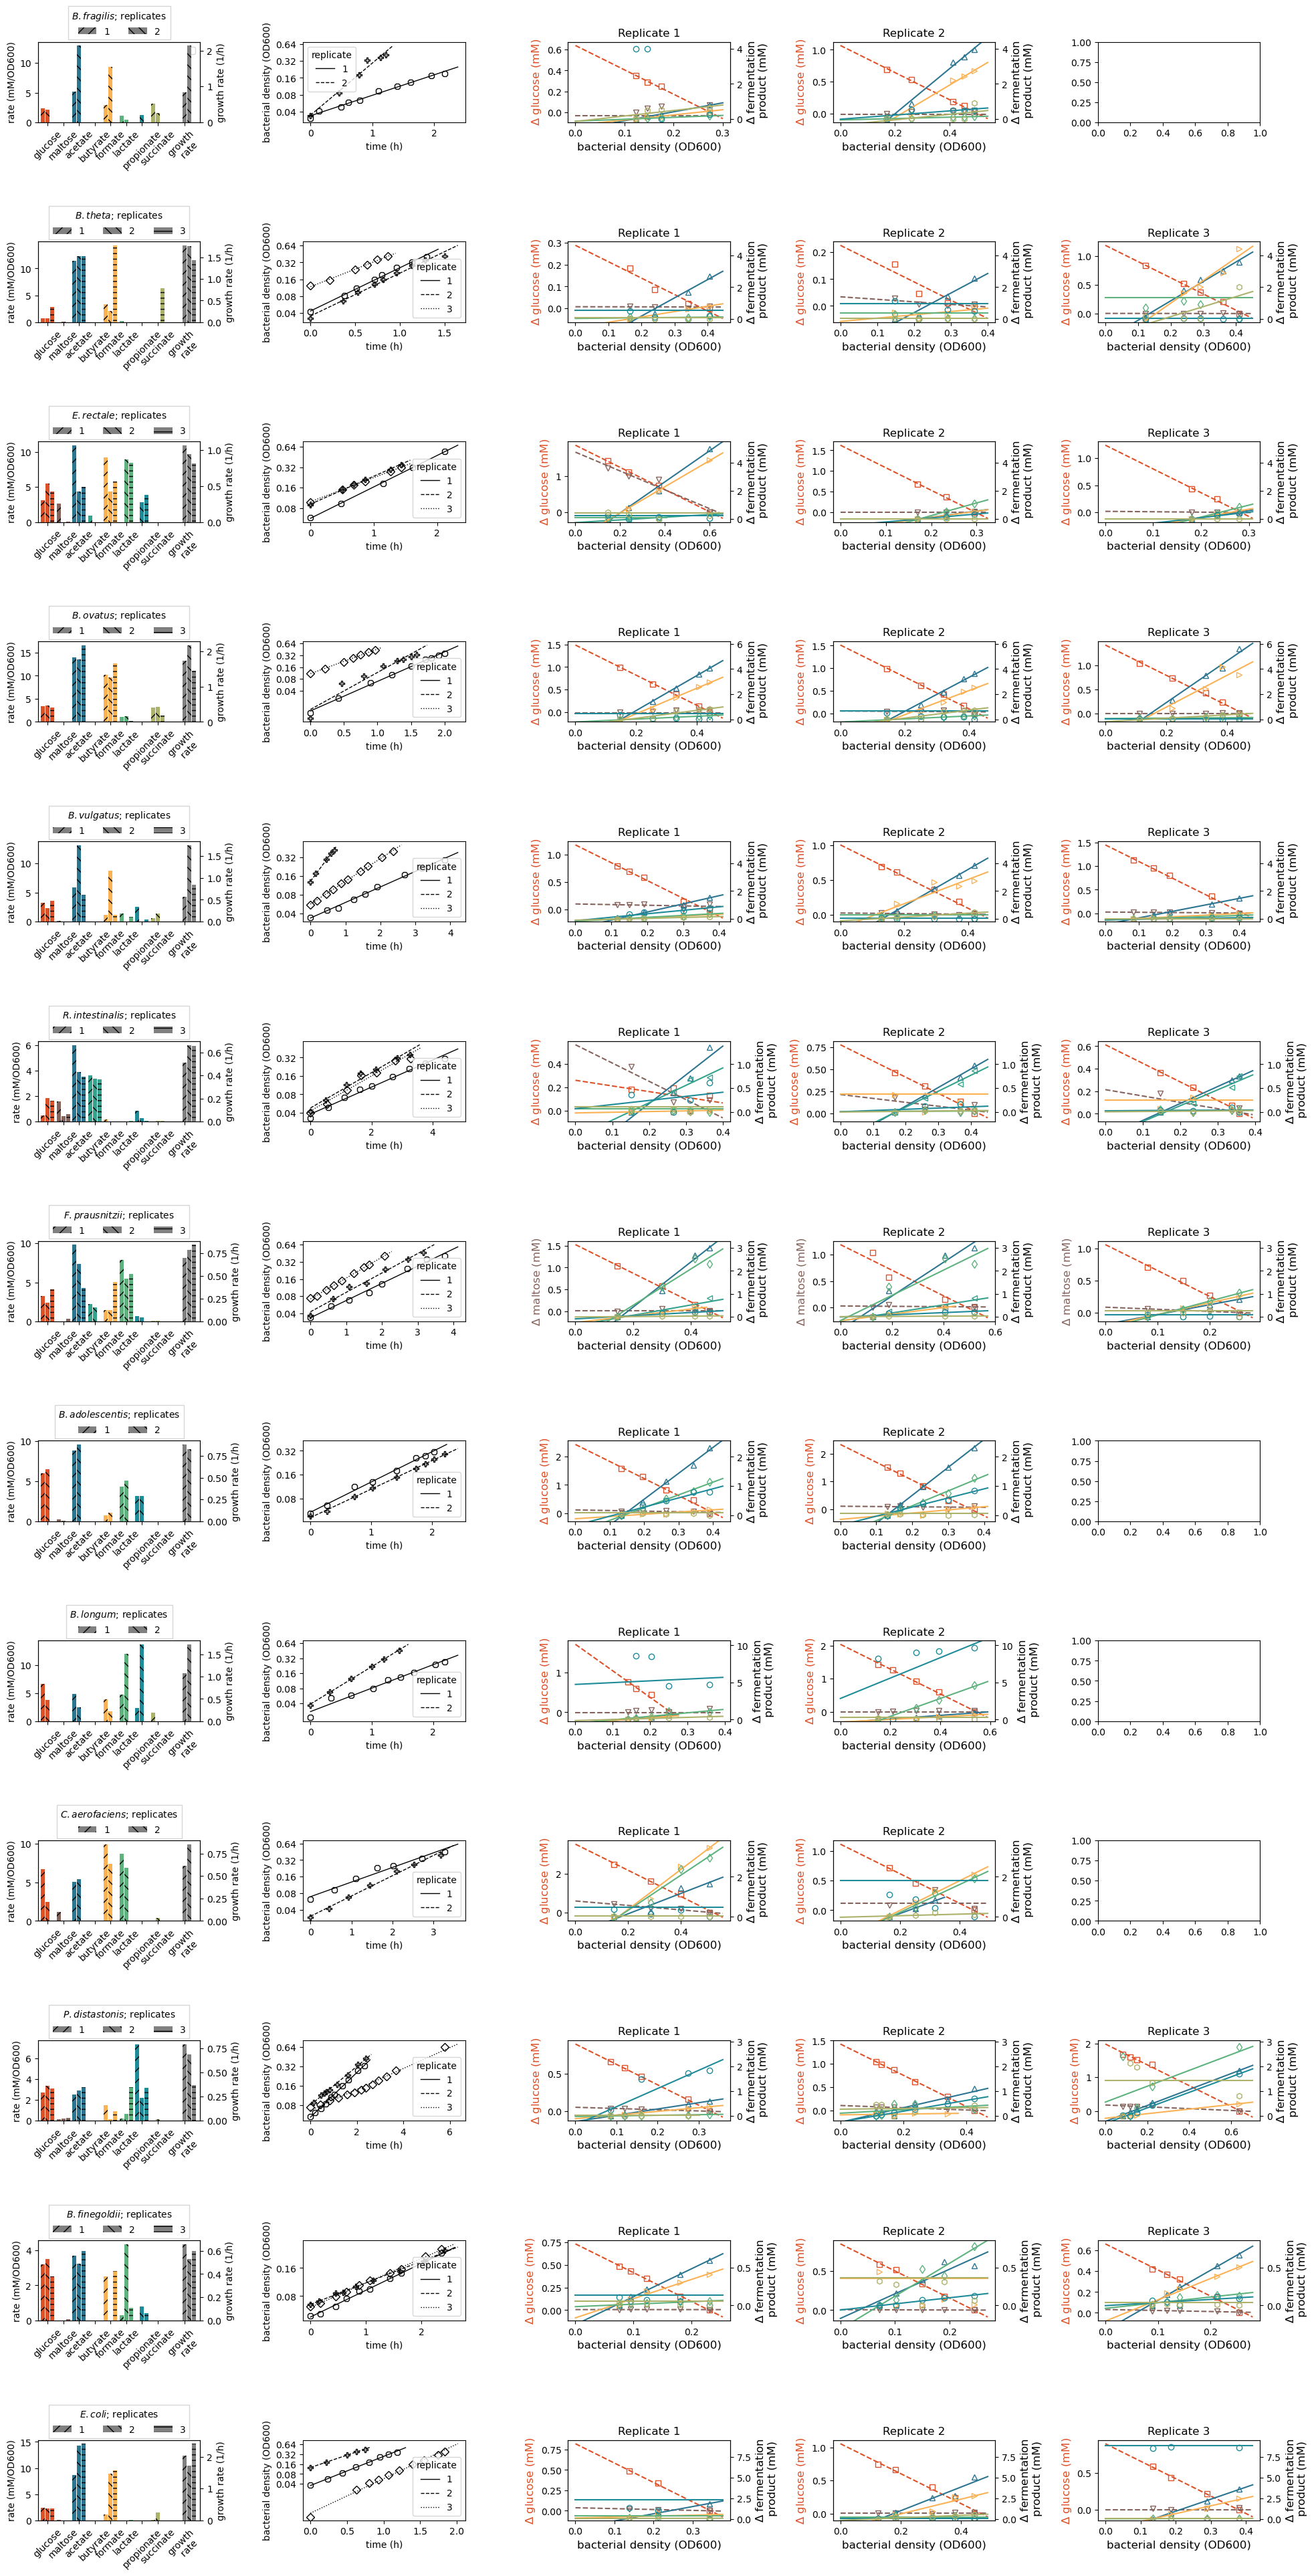

gamma


Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  notes    strain     species  \
64             64          64.0       144.0    NaN  DSM 1447  B.vulgatus   
173           173           NaN         NaN    NaN  DSM 1447  B.vulgatus   
172           172           NaN         NaN    NaN  DSM 1447  B.vulgatus   
171           171           NaN         NaN    NaN  DSM 1447  B.vulgatus   
65             65          65.0        16.0    NaN  DSM 1447  B.vulgatus   
..            ...           ...         ...    ...       ...         ...   
179           179           NaN         NaN    NaN   NCM3722      E.coli   
178           178           NaN         NaN    NaN   NCM3722      E.coli   
177           177           NaN         NaN    NaN   NCM3722      E.coli   
89             89          89.0       151.0    NaN   NCM3722      E.coli   
82             82          82.0       106.0    NaN   NCM3722      E.coli   

                                            experiment  \
64                                                 NaN   
173              av [204, 205]_used_only: [60.0, 67.0]   
172  av [201, 200, 119, 170, 118]_used_only: [57.0,...   
171  av [19, 183, 182, 11]_used_only: [59.0, 64.0, ...   
65                      analysis_stan_YCA_230607_2.5mM   
..                                                 ...   
179  av [146, 207, 206, 112]_used_only: [81.0, 83.0...   
178   av [187, 186, 171]_used_only: [78.0, 79.0, 80.0]   
177        av [1, 2, 22]_used_only: [82.0, 84.0, 86.0]   
89                                                 NaN   
82                                                 NaN   

                    experiment_short                    exp_number   medium  \
64                  stan_BHI_30Dec22                           200      BHI   
173                               av  av_B.vulgatus_DSM 1447_gamma    gamma   
172                               av    av_B.vulgatus_DSM 1447_BHI      BHI   
171                               av    av_B.vulgatus_DSM 1447_YCA      YCA   
65    analysis_stan_YCA_230607_2.5mM                            19      YCA   
..                               ...                           ...      ...   
179                               av       av_E.coli_NCM3722_gamma    gamma   
178                               av         av_E.coli_NCM3722_BHI      BHI   
177                               av         av_E.coli_NCM3722_YCA      YCA   
89   stan_simple_medium_230908_2.5mM                           207    gamma   
82     analysis_stan_eplus_Oct22.csv                           150  epsilon   

     ... succinate_std  lactate_std  butyrate_std formate_std maltose_std  \
64   ...           NaN          NaN           NaN         NaN         NaN   
173  ...      0.240028     0.070391      0.000000    0.000000         NaN   
172  ...      0.632375     6.156752      0.000000    3.356404    0.065167   
171  ...      0.444575     0.103855      0.000000    0.740572    0.000000   
65   ...           NaN          NaN           NaN         NaN         NaN   
..   ...           ...          ...           ...         ...         ...   
179  ...      0.141871     0.179215      0.000000    1.740448         NaN   
178  ...      0.851301     0.055860      0.000000    4.676450    0.062596   
177  ...      0.397216     0.461203      0.096961    1.132453    0.000000   
89   ...           NaN          NaN           NaN         NaN         NaN   
82   ...           NaN          NaN           NaN         NaN         NaN   

    total_ferm  total_ferm_std  total_uptake  total_uptake_std  \
64         NaN             NaN           NaN               NaN   
173   6.217655        0.188644           NaN               NaN   
172  15.126920        5.463276     -3.551213          1.597544   
171  11.636814        0.364322     -5.365080          0.437954   
65         NaN             NaN           NaN               NaN   
..         ...             ...           ...               ...   
179  36.982393        2.023836    -10.867657               

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  notes     strain     species  \
66            66          66.0       148.0    NaN   DSM 1447  B.vulgatus   
73            73          73.0       149.0    NaN   DSM 1447  B.vulgatus   
11            11          11.0        87.0    NaN  ATCC25285  B.fragilis   
18            18          18.0       105.0    NaN  ATCC25285  B.fragilis   
52            52          52.0        88.0    NaN  ATCC29148     B.theta   
57            57          57.0       146.0    NaN  ATCC29148     B.theta   
54            54          54.0       147.0    NaN  ATCC29148     B.theta   
93            93          93.0        86.0    NaN    NCM3722      E.coli   
91            91          91.0       150.0    NaN    NCM3722      E.coli   
87            87          87.0       104.0    NaN    NCM3722      E.coli   
89            89          89.0       151.0    NaN    NCM3722      E.coli   

   experiment                     experiment_short exp_number medium  ...  \
66        NaN      stan_simple_medium_230908_2.5mM        204  gamma  ...   
73        NaN      stan_simple_medium_230908_2.5mM        205  gamma  ...   
11        NaN  analysis_stan_eplus_wotrp_Oct22.csv        113  gamma  ...   
18        NaN             analysis_stan_simple.csv        147  gamma  ...   
52        NaN  analysis_stan_eplus_wotrp_Oct22.csv        115  gamma  ...   
57        NaN      stan_simple_medium_230908_2.5mM        202  gamma  ...   
54        NaN      stan_simple_medium_230908_2.5mM        203  gamma  ...   
93        NaN  analysis_stan_eplus_wotrp_Oct22.csv        112  gamma  ...   
91        NaN      stan_simple_medium_230908_2.5mM        206  gamma  ...   
87        NaN             analysis_stan_simple.csv        146  gamma  ...   
89        NaN      stan_simple_medium_230908_2.5mM        207  gamma  ...   

   succinate_std  lactate_std  butyrate_std formate_std maltose_std  \
66           NaN          NaN           NaN         NaN         NaN   
73           NaN          NaN           NaN         NaN         NaN   
11           NaN          NaN           NaN         NaN         NaN   
18           NaN          NaN           NaN         NaN         NaN   
52           NaN          NaN           NaN         NaN         NaN   
57           NaN          NaN           NaN         NaN         NaN   
54           NaN          NaN           NaN         NaN         NaN   
93           NaN          NaN           NaN         NaN         NaN   
91           NaN          NaN           NaN         NaN         NaN   
87           NaN          NaN           NaN         NaN         NaN   
89           NaN          NaN           NaN         NaN         NaN   

   total_ferm  total_ferm_std  total_uptake  total_uptake_std  growth_rate_std  
66        NaN             NaN           NaN               NaN              NaN  
73        NaN             NaN           NaN               NaN              NaN  
11        NaN             NaN           NaN               NaN              NaN  
18        NaN             NaN           NaN               NaN              NaN  
52        NaN             NaN           NaN               NaN              NaN  
57        NaN             NaN           NaN               NaN              NaN  
54        NaN             NaN           NaN               NaN              NaN  
93        NaN             NaN           NaN               NaN              NaN  
91        NaN             NaN           NaN               NaN              NaN  
87        NaN             NaN           NaN               NaN              NaN  
89        NaN             NaN           NaN               NaN              NaN  

[11 rows x 64 columns]

********** Strain:
ATCC25285
['0.061', ' 0.072', ' 0.085', ' 0.097', ' 0.111', ' 0.128', ' 0.139', ' 0.157', ' 0.192', ' 0.211', ' 0.227', ' 0.33']
['0.0', ' 0.683333333', ' 1.133333333', ' 1.45', ' 1.766666667', ' 2.383333333', ' 2.683333333', ' 3.016666667', ' 3.65', ' 3.916666667', ' 4.15', ' 5.3']
['0.064', ' 0.08', ' 0.126', ' 0.149', ' 0.17', ' 0.254', ' 0.368', ' nan', ' nan', ' nan', ' nan']
['0.0', ' 0.416666667', ' 0.9', ' 1.566666667', ' 1.683333333', ' 3.25', ' 3.9', ' nan', ' nan', ' nan', ' nan']
[[7.469686635309559, 5.181692195386106], [0.0324430104768542], [4.782880888216051, 3.218658170402831], [], [5.92696425490033, 2.793164899410476], [0.7668649623122943, 0.3429240773660639], [2.26978592092665, 1.3856185193911097], [0.1822888909204918, 0.3675764861352726]]
********** Strain:
ATCC29148
['0.057', ' 0.086', ' 0.104', ' 0.117', ' 0.134', ' 0.174', ' 0.197', ' 0.234', ' 0.29', ' 0.332', ' 0.368', ' nan']
['0.0', ' 0.683333333', ' 1.133333333', ' 1.45', ' 1.766666667', ' 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


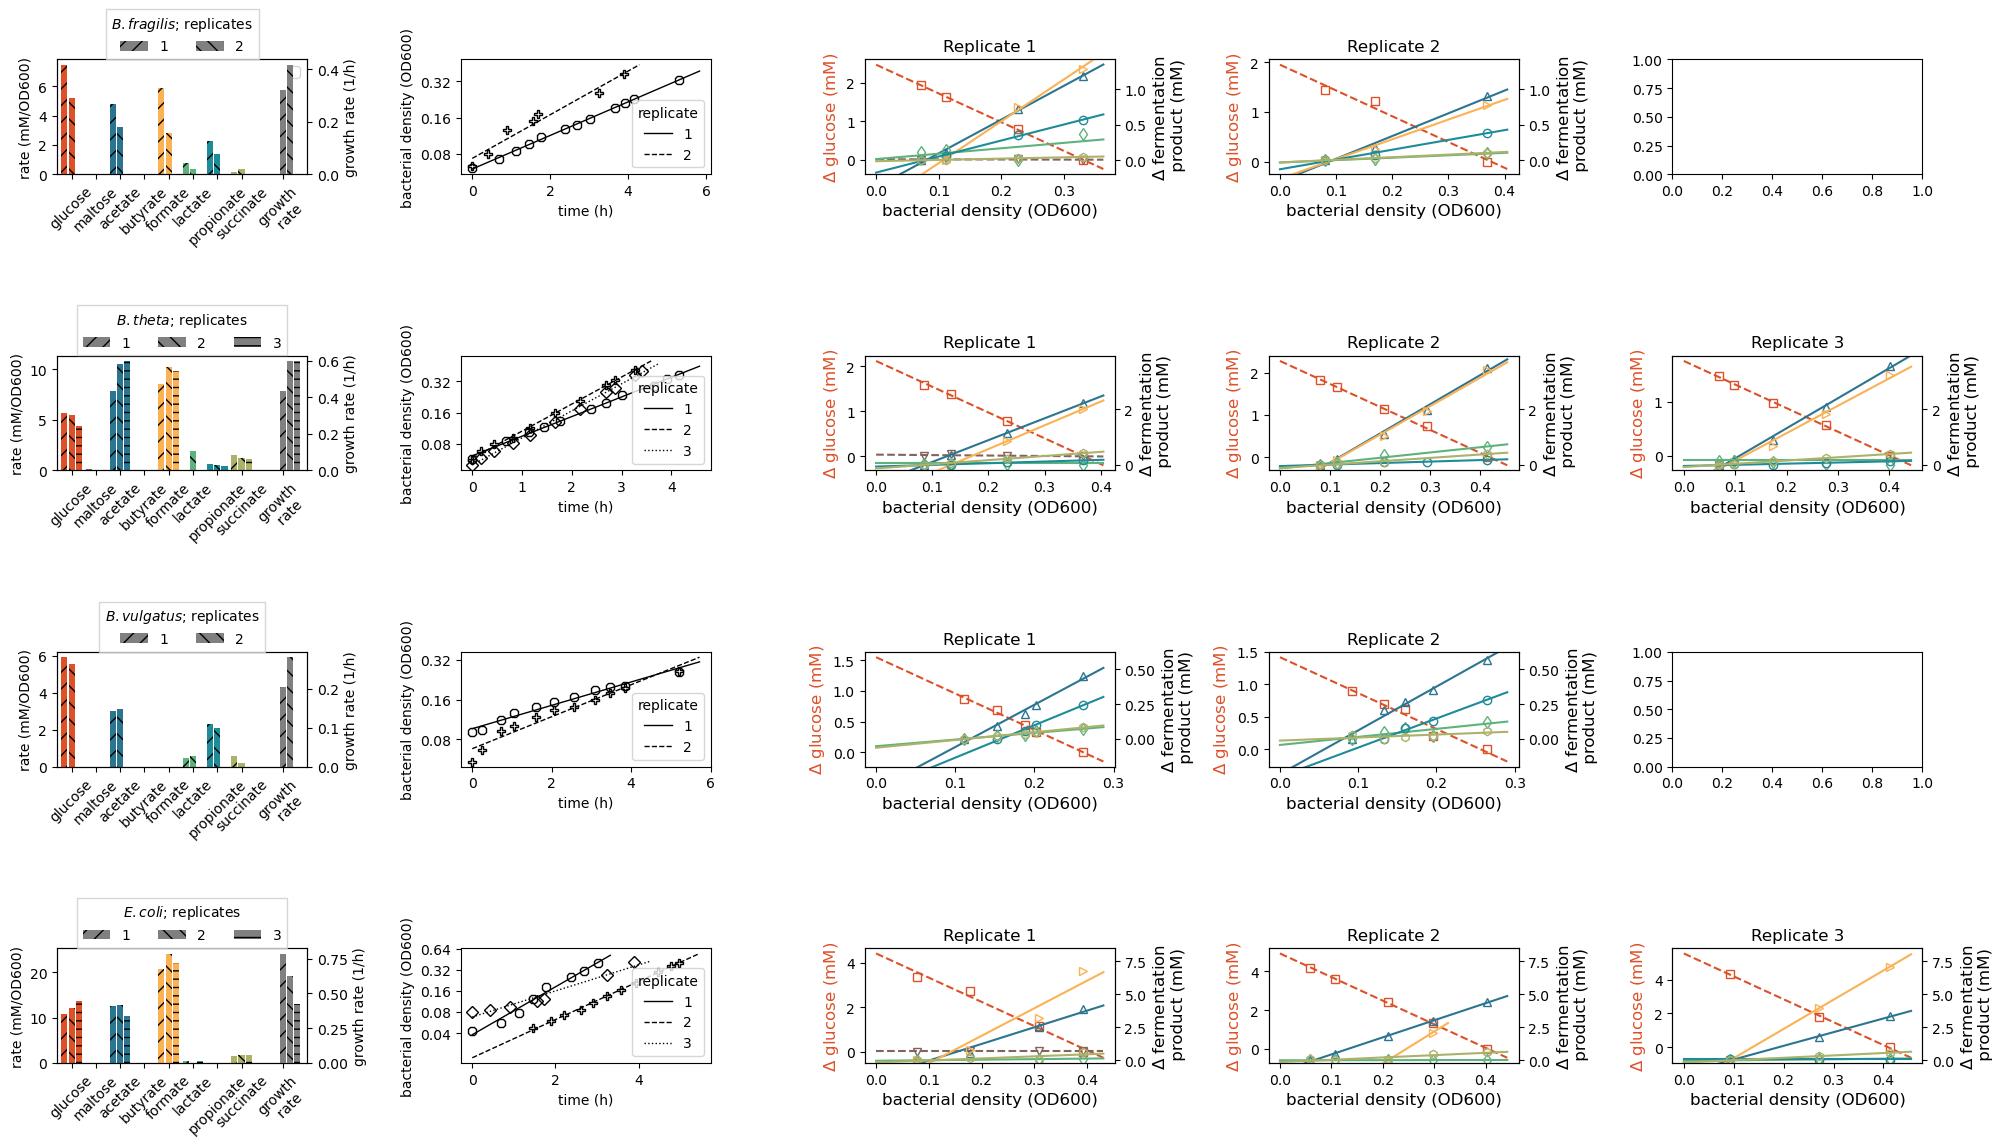

YCA


Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  notes    strain     species  \
64             64          64.0       144.0    NaN  DSM 1447  B.vulgatus   
173           173           NaN         NaN    NaN  DSM 1447  B.vulgatus   
172           172           NaN         NaN    NaN  DSM 1447  B.vulgatus   
171           171           NaN         NaN    NaN  DSM 1447  B.vulgatus   
65             65          65.0        16.0    NaN  DSM 1447  B.vulgatus   
..            ...           ...         ...    ...       ...         ...   
179           179           NaN         NaN    NaN   NCM3722      E.coli   
178           178           NaN         NaN    NaN   NCM3722      E.coli   
177           177           NaN         NaN    NaN   NCM3722      E.coli   
89             89          89.0       151.0    NaN   NCM3722      E.coli   
82             82          82.0       106.0    NaN   NCM3722      E.coli   

                                            experiment  \
64                                                 NaN   
173              av [204, 205]_used_only: [60.0, 67.0]   
172  av [201, 200, 119, 170, 118]_used_only: [57.0,...   
171  av [19, 183, 182, 11]_used_only: [59.0, 64.0, ...   
65                      analysis_stan_YCA_230607_2.5mM   
..                                                 ...   
179  av [146, 207, 206, 112]_used_only: [81.0, 83.0...   
178   av [187, 186, 171]_used_only: [78.0, 79.0, 80.0]   
177        av [1, 2, 22]_used_only: [82.0, 84.0, 86.0]   
89                                                 NaN   
82                                                 NaN   

                    experiment_short                    exp_number   medium  \
64                  stan_BHI_30Dec22                           200      BHI   
173                               av  av_B.vulgatus_DSM 1447_gamma    gamma   
172                               av    av_B.vulgatus_DSM 1447_BHI      BHI   
171                               av    av_B.vulgatus_DSM 1447_YCA      YCA   
65    analysis_stan_YCA_230607_2.5mM                            19      YCA   
..                               ...                           ...      ...   
179                               av       av_E.coli_NCM3722_gamma    gamma   
178                               av         av_E.coli_NCM3722_BHI      BHI   
177                               av         av_E.coli_NCM3722_YCA      YCA   
89   stan_simple_medium_230908_2.5mM                           207    gamma   
82     analysis_stan_eplus_Oct22.csv                           150  epsilon   

     ... succinate_std  lactate_std  butyrate_std formate_std maltose_std  \
64   ...           NaN          NaN           NaN         NaN         NaN   
173  ...      0.240028     0.070391      0.000000    0.000000         NaN   
172  ...      0.632375     6.156752      0.000000    3.356404    0.065167   
171  ...      0.444575     0.103855      0.000000    0.740572    0.000000   
65   ...           NaN          NaN           NaN         NaN         NaN   
..   ...           ...          ...           ...         ...         ...   
179  ...      0.141871     0.179215      0.000000    1.740448         NaN   
178  ...      0.851301     0.055860      0.000000    4.676450    0.062596   
177  ...      0.397216     0.461203      0.096961    1.132453    0.000000   
89   ...           NaN          NaN           NaN         NaN         NaN   
82   ...           NaN          NaN           NaN         NaN         NaN   

    total_ferm  total_ferm_std  total_uptake  total_uptake_std  \
64         NaN             NaN           NaN               NaN   
173   6.217655        0.188644           NaN               NaN   
172  15.126920        5.463276     -3.551213          1.597544   
171  11.636814        0.364322     -5.365080          0.437954   
65         NaN             NaN           NaN               NaN   
..         ...             ...           ...               ...   
179  36.982393        2.023836    -10.867657               

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  notes     strain         species  \
65             65          65.0        16.0    NaN   DSM 1447      B.vulgatus   
70             70          70.0       127.0    NaN   DSM 1447      B.vulgatus   
71             71          71.0       126.0    NaN   DSM 1447      B.vulgatus   
72             72          72.0         8.0    NaN   DSM 1447      B.vulgatus   
19             19          19.0         3.0    NaN  ATCC25285      B.fragilis   
17             17          17.0         2.0    NaN  ATCC25285      B.fragilis   
16             16          16.0        14.0    NaN  ATCC25285      B.fragilis   
34             34          34.0        15.0    NaN   ATCC8483        B.ovatus   
29             29          29.0         6.0    NaN   ATCC8483        B.ovatus   
30             30          30.0         7.0    NaN   ATCC8483        B.ovatus   
55             55          55.0        39.0    NaN  ATCC29148         B.theta   
51             51          51.0        47.0    NaN  ATCC29148         B.theta   
56             56          56.0        31.0    NaN  ATCC29148         B.theta   
6               6           6.0         4.0    NaN     HM-727    B.finegoldii   
10             10          10.0        17.0    NaN     HM-727    B.finegoldii   
7               7           7.0         5.0    NaN     HM-727    B.finegoldii   
60             60          60.0        21.0    NaN   ATCC8492     B.uniformis   
62             62          62.0        22.0    NaN   ATCC8492     B.uniformis   
61             61          61.0        20.0    NaN   ATCC8492     B.uniformis   
130           130         130.0        25.0    NaN   DSM18205         P.copri   
129           129         129.0        24.0    NaN   DSM18205         P.copri   
128           128         128.0        23.0    NaN   DSM18205         P.copri   
131           131         131.0        10.0    NaN     HM-169   P.distastonis   
132           132         132.0        13.0    NaN     HM-169   P.distastonis   
133           133         133.0         9.0    NaN     HM-169   P.distastonis   
136           136         136.0       125.0    NaN     HM-169   P.distastonis   
109           109         109.0        32.0    NaN  ATCC33656       E.rectale   
106           106         106.0        26.0    NaN  ATCC33656       E.rectale   
94             94          94.0        35.0    NaN  ATCC33656       E.rectale   
146           146         146.0        27.0    NaN   DSM14610  R.intestinalis   
147           147         147.0        33.0    NaN   DSM14610  R.intestinalis   
148           148         148.0        41.0    NaN   DSM14610  R.intestinalis   
149           149         149.0        40.0    NaN   DSM14610  R.intestinalis   
122           122         122.0        48.0    NaN   DSM17677   F.prausnitzii   
121           121         121.0        42.0    NaN   DSM17677   F.prausnitzii   
120           120         120.0        36.0    NaN   DSM17677   F.prausnitzii   
144           144         144.0        12.0    NaN  ATCC27255        R.bromii   
143           143         143.0        11.0    NaN  ATCC27255        R.bromii   
141           141         141.0       128.0    NaN  ATCC27255        R.bromii   
140           140         140.0       129.0    NaN  ATCC27255        R.bromii   
139           139         139.0        18.0    NaN  ATCC27255        R.bromii   
24             24          24.0        37.0    NaN   DSM20219        B.longum   
25             25          25.0        28.0    NaN   DSM20219        B.longum   
26             26          26.0        34.0    NaN   DSM20219        B.longum   
0               0           0.0        45.0    NaN   DSM20083  B.adolescentis   
1               1           1.0        38.0    NaN   DSM20083  B.adolescentis   
2               2           2.0        29.0    NaN   DSM20083  B.adolescentis   
81             81          81.0        43.0    NaN    DSM3979   C.aerofaciens   
78             78          78.0     

********** Strain:
ATCC25285
['0.074', ' 0.085', ' 0.126', ' 0.17', ' 0.195', ' 0.21', ' 0.235', ' 0.272', ' 0.304', ' 0.325', ' 0.362']
['0.0', ' 0.333333333', ' 0.7', ' 1.083333333', ' 1.416666667', ' 1.75', ' 2.083333333', ' 2.416666667', ' 2.75', ' 3.0', ' 3.25']
['0.046', ' 0.056', ' 0.071', ' 0.1', ' 0.14', ' 0.189', ' 0.256', ' 0.348', ' 0.481', ' nan', ' nan']
['0.0', ' 0.233333333', ' 0.45', ' 0.883333333', ' 1.233333333', ' 1.55', ' 1.883333333', ' 2.2', ' 2.533333333', ' nan', ' nan']
['0.083', ' 0.107', ' 0.125', ' 0.154', ' 0.183', ' 0.216', ' 0.262', ' 0.333', ' 0.412', ' nan', ' nan', ' nan']
['0.0', ' 0.233333333', ' 0.483333333', ' 0.7', ' 1.016666667', ' 1.216666667', ' 1.416666667', ' 1.75', ' 1.95', ' nan', ' nan', ' nan']
[[6.248209701746614, 3.9514754869837505, 4.297026723483769], [-0.0, -0.0, -0.0], [3.5370442482770725, 3.7649236240421886, 3.186035810457877], [0.0, 0.0, 0.0], [1.9994543514211969, 2.4260896904780136, 2.1354710688470586], [0.0, 1.4976134119651066, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['0.093', ' 0.114', ' 0.139', ' 0.174', ' 0.21', ' 0.241', ' 0.268', ' 0.327', ' 0.373', ' nan', ' nan', ' nan']
['0.0', ' 0.233333333', ' 0.483333333', ' 0.7', ' 1.05', ' 1.216666667', ' 1.416666667', ' 1.75', ' 1.95', ' nan', ' nan', ' nan']
[[4.074810192111069, 5.546639912146562, 4.342713559449411], [-0.0, -0.0, -0.0], [3.275766309230644, 4.380909695513184, 3.3440816493081376], [0.0360340701100752, 0.0076684043482375, 0.0], [1.8228106983810413, 2.0860288274874432, 1.5304638346254518], [0.0964675759765767, 0.0251897285011795, 0.2104997090196068], [0.6600233560296405, 1.9927849792963217, 0.346536104786684], [1.9327916414516904, 2.137692465191418, 2.004002989645933]]
********** Strain:
NCM3722
['0.076', ' 0.11', ' 0.136', ' 0.148', ' 0.187', ' 0.235', ' 0.352', ' 0.397', ' nan', ' nan', ' nan']
['0.0', ' 0.166666667', ' 0.3', ' 0.433333333', ' 0.6', ' 0.75', ' 0.983333333', ' 1.05', ' nan', ' nan', ' nan']
['0.065', ' 0.085', ' 0.136', ' 0.156', ' 0.178', ' 0.252', ' 0.3', ' 0.402']
['

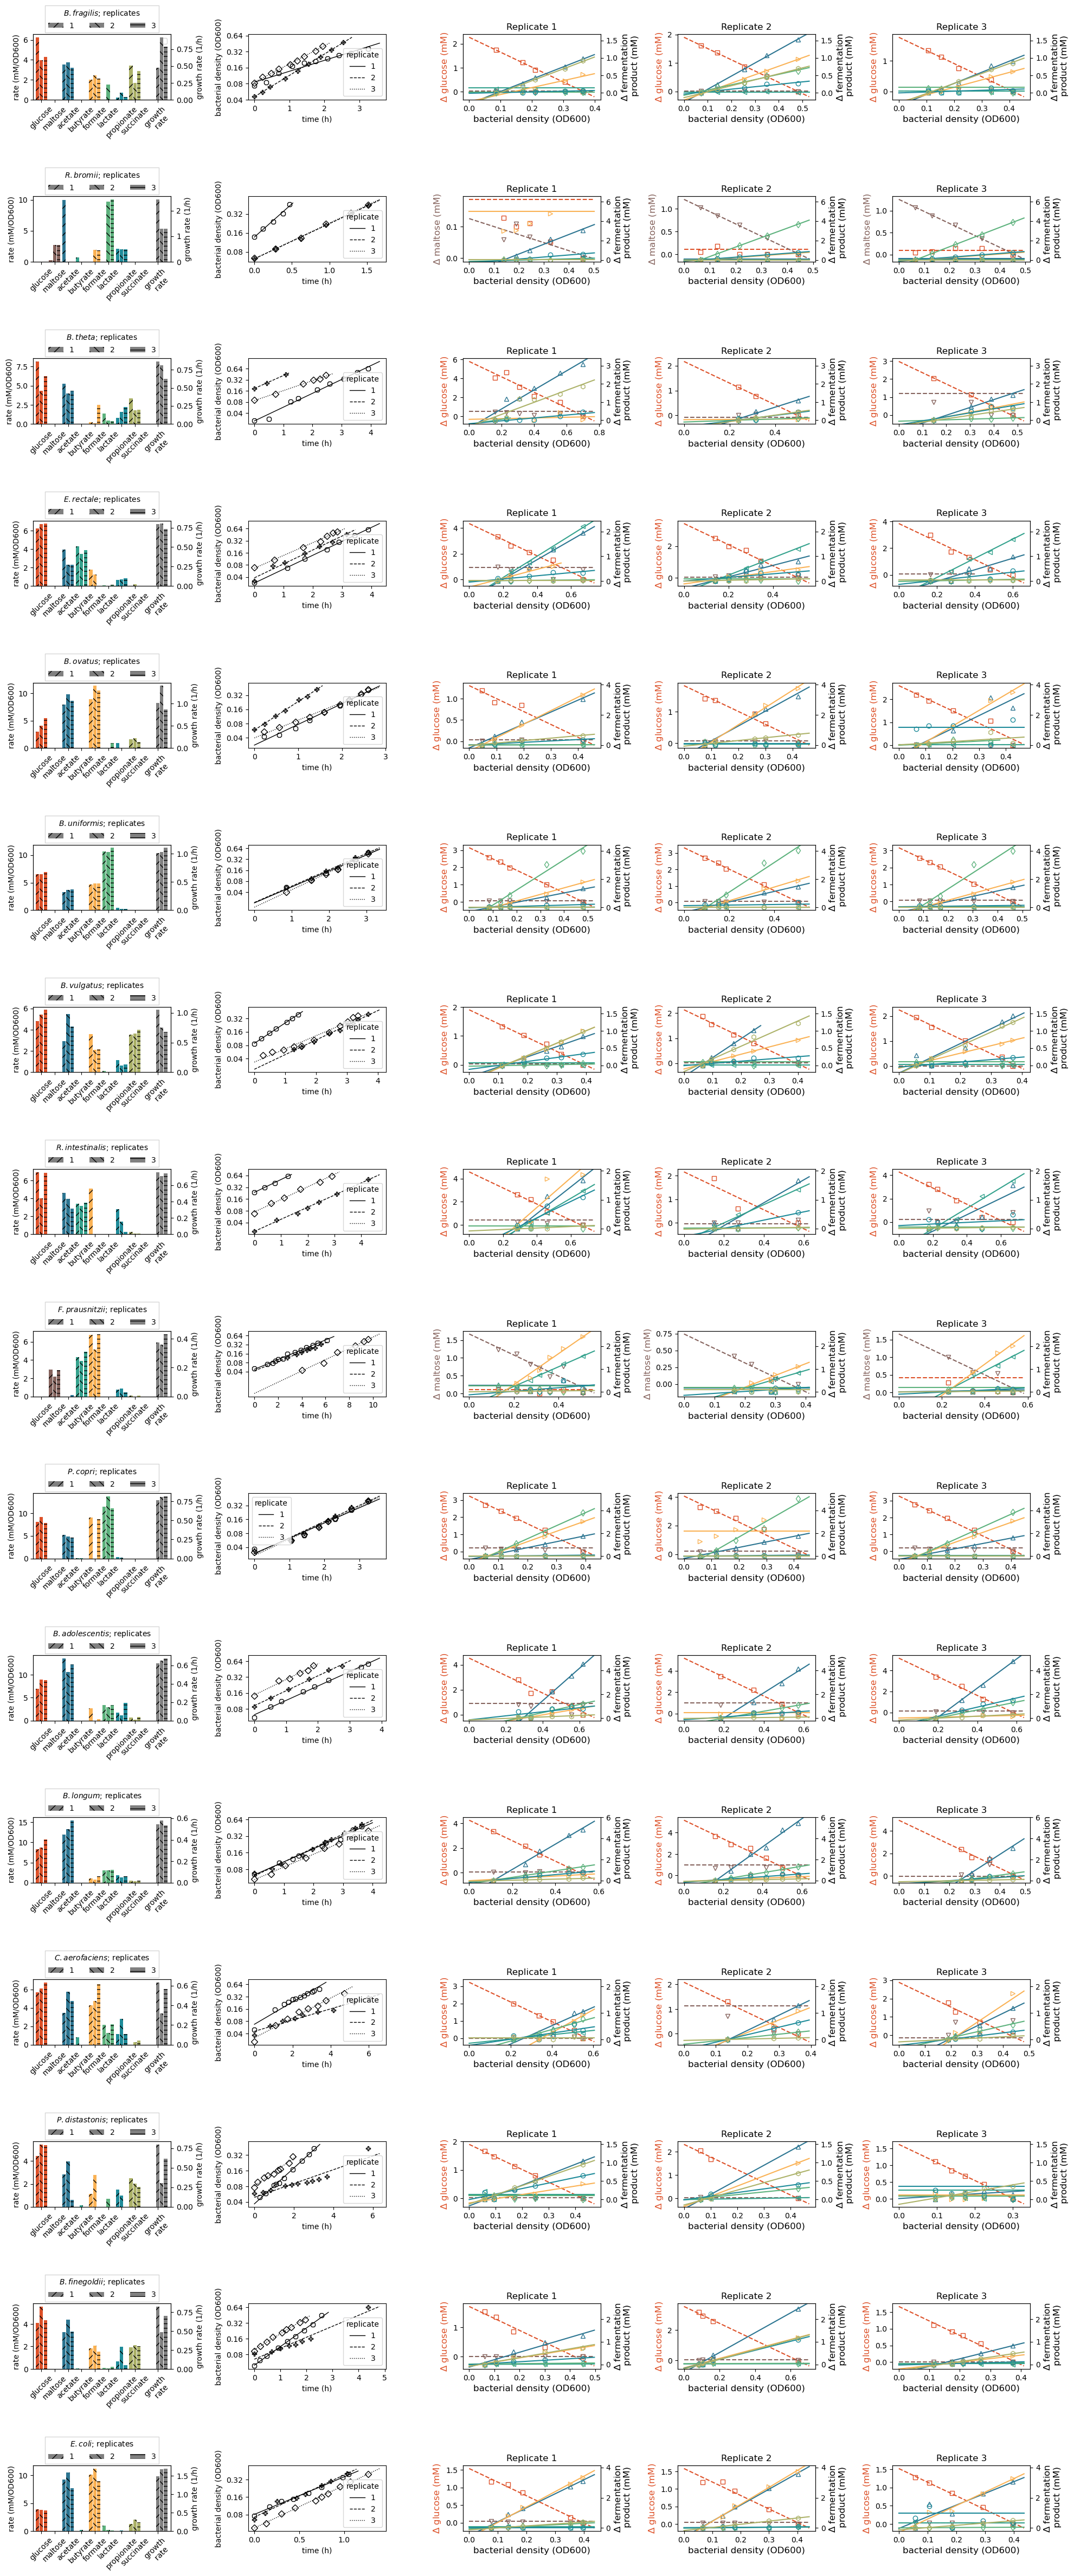

epsilon


Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  notes    strain     species  \
64             64          64.0       144.0    NaN  DSM 1447  B.vulgatus   
173           173           NaN         NaN    NaN  DSM 1447  B.vulgatus   
172           172           NaN         NaN    NaN  DSM 1447  B.vulgatus   
171           171           NaN         NaN    NaN  DSM 1447  B.vulgatus   
65             65          65.0        16.0    NaN  DSM 1447  B.vulgatus   
..            ...           ...         ...    ...       ...         ...   
179           179           NaN         NaN    NaN   NCM3722      E.coli   
178           178           NaN         NaN    NaN   NCM3722      E.coli   
177           177           NaN         NaN    NaN   NCM3722      E.coli   
89             89          89.0       151.0    NaN   NCM3722      E.coli   
82             82          82.0       106.0    NaN   NCM3722      E.coli   

                                            experiment  \
64                                                 NaN   
173              av [204, 205]_used_only: [60.0, 67.0]   
172  av [201, 200, 119, 170, 118]_used_only: [57.0,...   
171  av [19, 183, 182, 11]_used_only: [59.0, 64.0, ...   
65                      analysis_stan_YCA_230607_2.5mM   
..                                                 ...   
179  av [146, 207, 206, 112]_used_only: [81.0, 83.0...   
178   av [187, 186, 171]_used_only: [78.0, 79.0, 80.0]   
177        av [1, 2, 22]_used_only: [82.0, 84.0, 86.0]   
89                                                 NaN   
82                                                 NaN   

                    experiment_short                    exp_number   medium  \
64                  stan_BHI_30Dec22                           200      BHI   
173                               av  av_B.vulgatus_DSM 1447_gamma    gamma   
172                               av    av_B.vulgatus_DSM 1447_BHI      BHI   
171                               av    av_B.vulgatus_DSM 1447_YCA      YCA   
65    analysis_stan_YCA_230607_2.5mM                            19      YCA   
..                               ...                           ...      ...   
179                               av       av_E.coli_NCM3722_gamma    gamma   
178                               av         av_E.coli_NCM3722_BHI      BHI   
177                               av         av_E.coli_NCM3722_YCA      YCA   
89   stan_simple_medium_230908_2.5mM                           207    gamma   
82     analysis_stan_eplus_Oct22.csv                           150  epsilon   

     ... succinate_std  lactate_std  butyrate_std formate_std maltose_std  \
64   ...           NaN          NaN           NaN         NaN         NaN   
173  ...      0.240028     0.070391      0.000000    0.000000         NaN   
172  ...      0.632375     6.156752      0.000000    3.356404    0.065167   
171  ...      0.444575     0.103855      0.000000    0.740572    0.000000   
65   ...           NaN          NaN           NaN         NaN         NaN   
..   ...           ...          ...           ...         ...         ...   
179  ...      0.141871     0.179215      0.000000    1.740448         NaN   
178  ...      0.851301     0.055860      0.000000    4.676450    0.062596   
177  ...      0.397216     0.461203      0.096961    1.132453    0.000000   
89   ...           NaN          NaN           NaN         NaN         NaN   
82   ...           NaN          NaN           NaN         NaN         NaN   

    total_ferm  total_ferm_std  total_uptake  total_uptake_std  \
64         NaN             NaN           NaN               NaN   
173   6.217655        0.188644           NaN               NaN   
172  15.126920        5.463276     -3.551213          1.597544   
171  11.636814        0.364322     -5.365080          0.437954   
65         NaN             NaN           NaN               NaN   
..         ...             ...           ...               ...   
179  36.982393        2.023836    -10.867657               

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  notes     strain        species  \
20             20          20.0        79.0    NaN  ATCC25285     B.fragilis   
14             14          14.0       107.0    NaN  ATCC25285     B.fragilis   
12             12          12.0       121.0    NaN  ATCC25285     B.fragilis   
31             31          31.0       110.0    NaN   ATCC8483       B.ovatus   
27             27          27.0       122.0    NaN   ATCC8483       B.ovatus   
53             53          53.0        49.0    NaN  ATCC29148        B.theta   
49             49          49.0        50.0    NaN  ATCC29148        B.theta   
36             36          36.0        52.0    NaN  ATCC29148        B.theta   
37             37          37.0        53.0    NaN  ATCC29148        B.theta   
39             39          39.0        54.0    NaN  ATCC29148        B.theta   
40             40          40.0       123.0    NaN  ATCC29148        B.theta   
42             42          42.0       108.0    NaN  ATCC29148        B.theta   
44             44          44.0        51.0    NaN  ATCC29148        B.theta   
45             45          45.0        80.0    NaN  ATCC29148        B.theta   
111           111         111.0        72.0    NaN  ATCC33656      E.rectale   
112           112         112.0        76.0    NaN  ATCC33656      E.rectale   
110           110         110.0        71.0    NaN  ATCC33656      E.rectale   
119           119         119.0        70.0    NaN  ATCC33656      E.rectale   
108           108         108.0        69.0    NaN  ATCC33656      E.rectale   
107           107         107.0        59.0    NaN  ATCC33656      E.rectale   
95             95          95.0        63.0    NaN  ATCC33656      E.rectale   
97             97          97.0        61.0    NaN  ATCC33656      E.rectale   
98             98          98.0        60.0    NaN  ATCC33656      E.rectale   
100           100         100.0        64.0    NaN  ATCC33656      E.rectale   
102           102         102.0        57.0    NaN  ATCC33656      E.rectale   
103           103         103.0        56.0    NaN  ATCC33656      E.rectale   
104           104         104.0        55.0    NaN  ATCC33656      E.rectale   
99             99          99.0        58.0    NaN  ATCC33656      E.rectale   
96             96          96.0        62.0    NaN  ATCC33656      E.rectale   
123           123         123.0       111.0    NaN   DSM17677  F.prausnitzii   
142           142         142.0       113.0    NaN  ATCC27255       R.bromii   
21             21          21.0       109.0    NaN   DSM20219       B.longum   
75             75          75.0        81.0    NaN    DSM3979  C.aerofaciens   
77             77          77.0       124.0    NaN    DSM3979  C.aerofaciens   
83             83          83.0       112.0    NaN    NCM3722         E.coli   
82             82          82.0       106.0    NaN    NCM3722         E.coli   

          experiment                      experiment_short exp_number  \
20               NaN  analysis_stan_eplus_wtrp_02Sep22.csv        102   
14               NaN         analysis_stan_eplus_Oct22.csv        151   
12               NaN        analysis_stan_eplus06Sep22.csv        174   
31               NaN               analysis_stan_eplus.csv        157   
27               NaN        analysis_stan_eplus06Sep22.csv        175   
53    Markus_old_Bt1                        Markus_old_Bt1         62   
49    Markus_old_Bt2                        Markus_old_Bt2         63   
36    Markus_old_Bt4                        Markus_old_Bt4         65   
37    Markus_old_Bt5                        Markus_old_Bt5         66   
39    Markus_old_Bt6                        Markus_old_Bt6         67   
40               NaN        analysis_stan_eplus06Sep22.csv        176   
42               NaN         analysis_stan_eplus_Oct22.csv        153   
44    Markus_old_Bt3                        Markus_old_Bt3         64   
45               NaN  

********** Strain:
ATCC25285
['0.057', ' 0.065', ' 0.09', ' 0.107', ' 0.124', ' 0.186', ' 0.238', ' 0.294', ' 0.406', ' nan', ' nan', ' nan']
['0.0', ' 0.783333333', ' 1.583333333', ' 2.2', ' 2.583333333', ' 3.416666667', ' 3.75', ' 4.116666667', ' 4.766666667', ' nan', ' nan', ' nan']
['0.038', ' 0.065', ' 0.095', ' 0.121', ' 0.151', ' 0.233', ' 0.264', ' 0.365', ' nan', ' nan', ' nan']
['0.0', ' 0.65', ' 1.133333333', ' 1.583333333', ' 1.916666667', ' 2.4', ' 2.65', ' 3.033333333', ' nan', ' nan', ' nan']
['0.057', ' 0.065', ' 0.09', ' 0.107', ' 0.124', ' 0.186', ' 0.238', ' 0.294', ' 0.406', ' nan', ' nan', ' nan']
['0.0', ' 0.783333333', ' 1.583333333', ' 2.2', ' 2.583333333', ' 3.416666667', ' 3.75', ' 4.116666667', ' 4.766666667', ' nan', ' nan', ' nan']
[[3.1416880400731673, 4.4423973520135815, 3.1416880400731673], [-0.0, -0.0, -0.0], [5.425514087136122, 2.48429358967283, 5.425514087136122], [], [1.492936161605513], [0.2355217334881658, 0.0, 0.2355217334881658], [0.2139338849174

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


********** Strain:
NCM3722
['0.064', ' 0.072', ' 0.091', ' 0.16', ' 0.272', ' 0.46', ' nan', ' nan', ' nan', ' nan', ' nan', ' nan']
['0.0', ' 0.316666667', ' 0.633333333', ' 1.1', ' 1.55', ' 1.983333333', ' nan', ' nan', ' nan', ' nan', ' nan', ' nan']
['0.045', ' 0.072', ' 0.1', ' 0.159', ' 0.183', ' 0.267', ' 0.31', ' 0.38', ' 0.4', ' nan', ' nan']
['0.0', ' 0.283333333', ' 0.45', ' 0.666666667', ' 0.766666667', ' 1.0', ' 1.083333333', ' 1.216666667', ' 1.266666667', ' nan', ' nan']
[[5.846958543562742, 5.059175151266734], [0.0400915004265854, -0.0], [8.342828374941591, 7.201736556864664], [], [10.87878851800522, 10.353240957781194], [0.1272261161839078, 1.0210667910644404], [0.0, 0.0], [2.0033750123828105, 1.1852790710337715]]


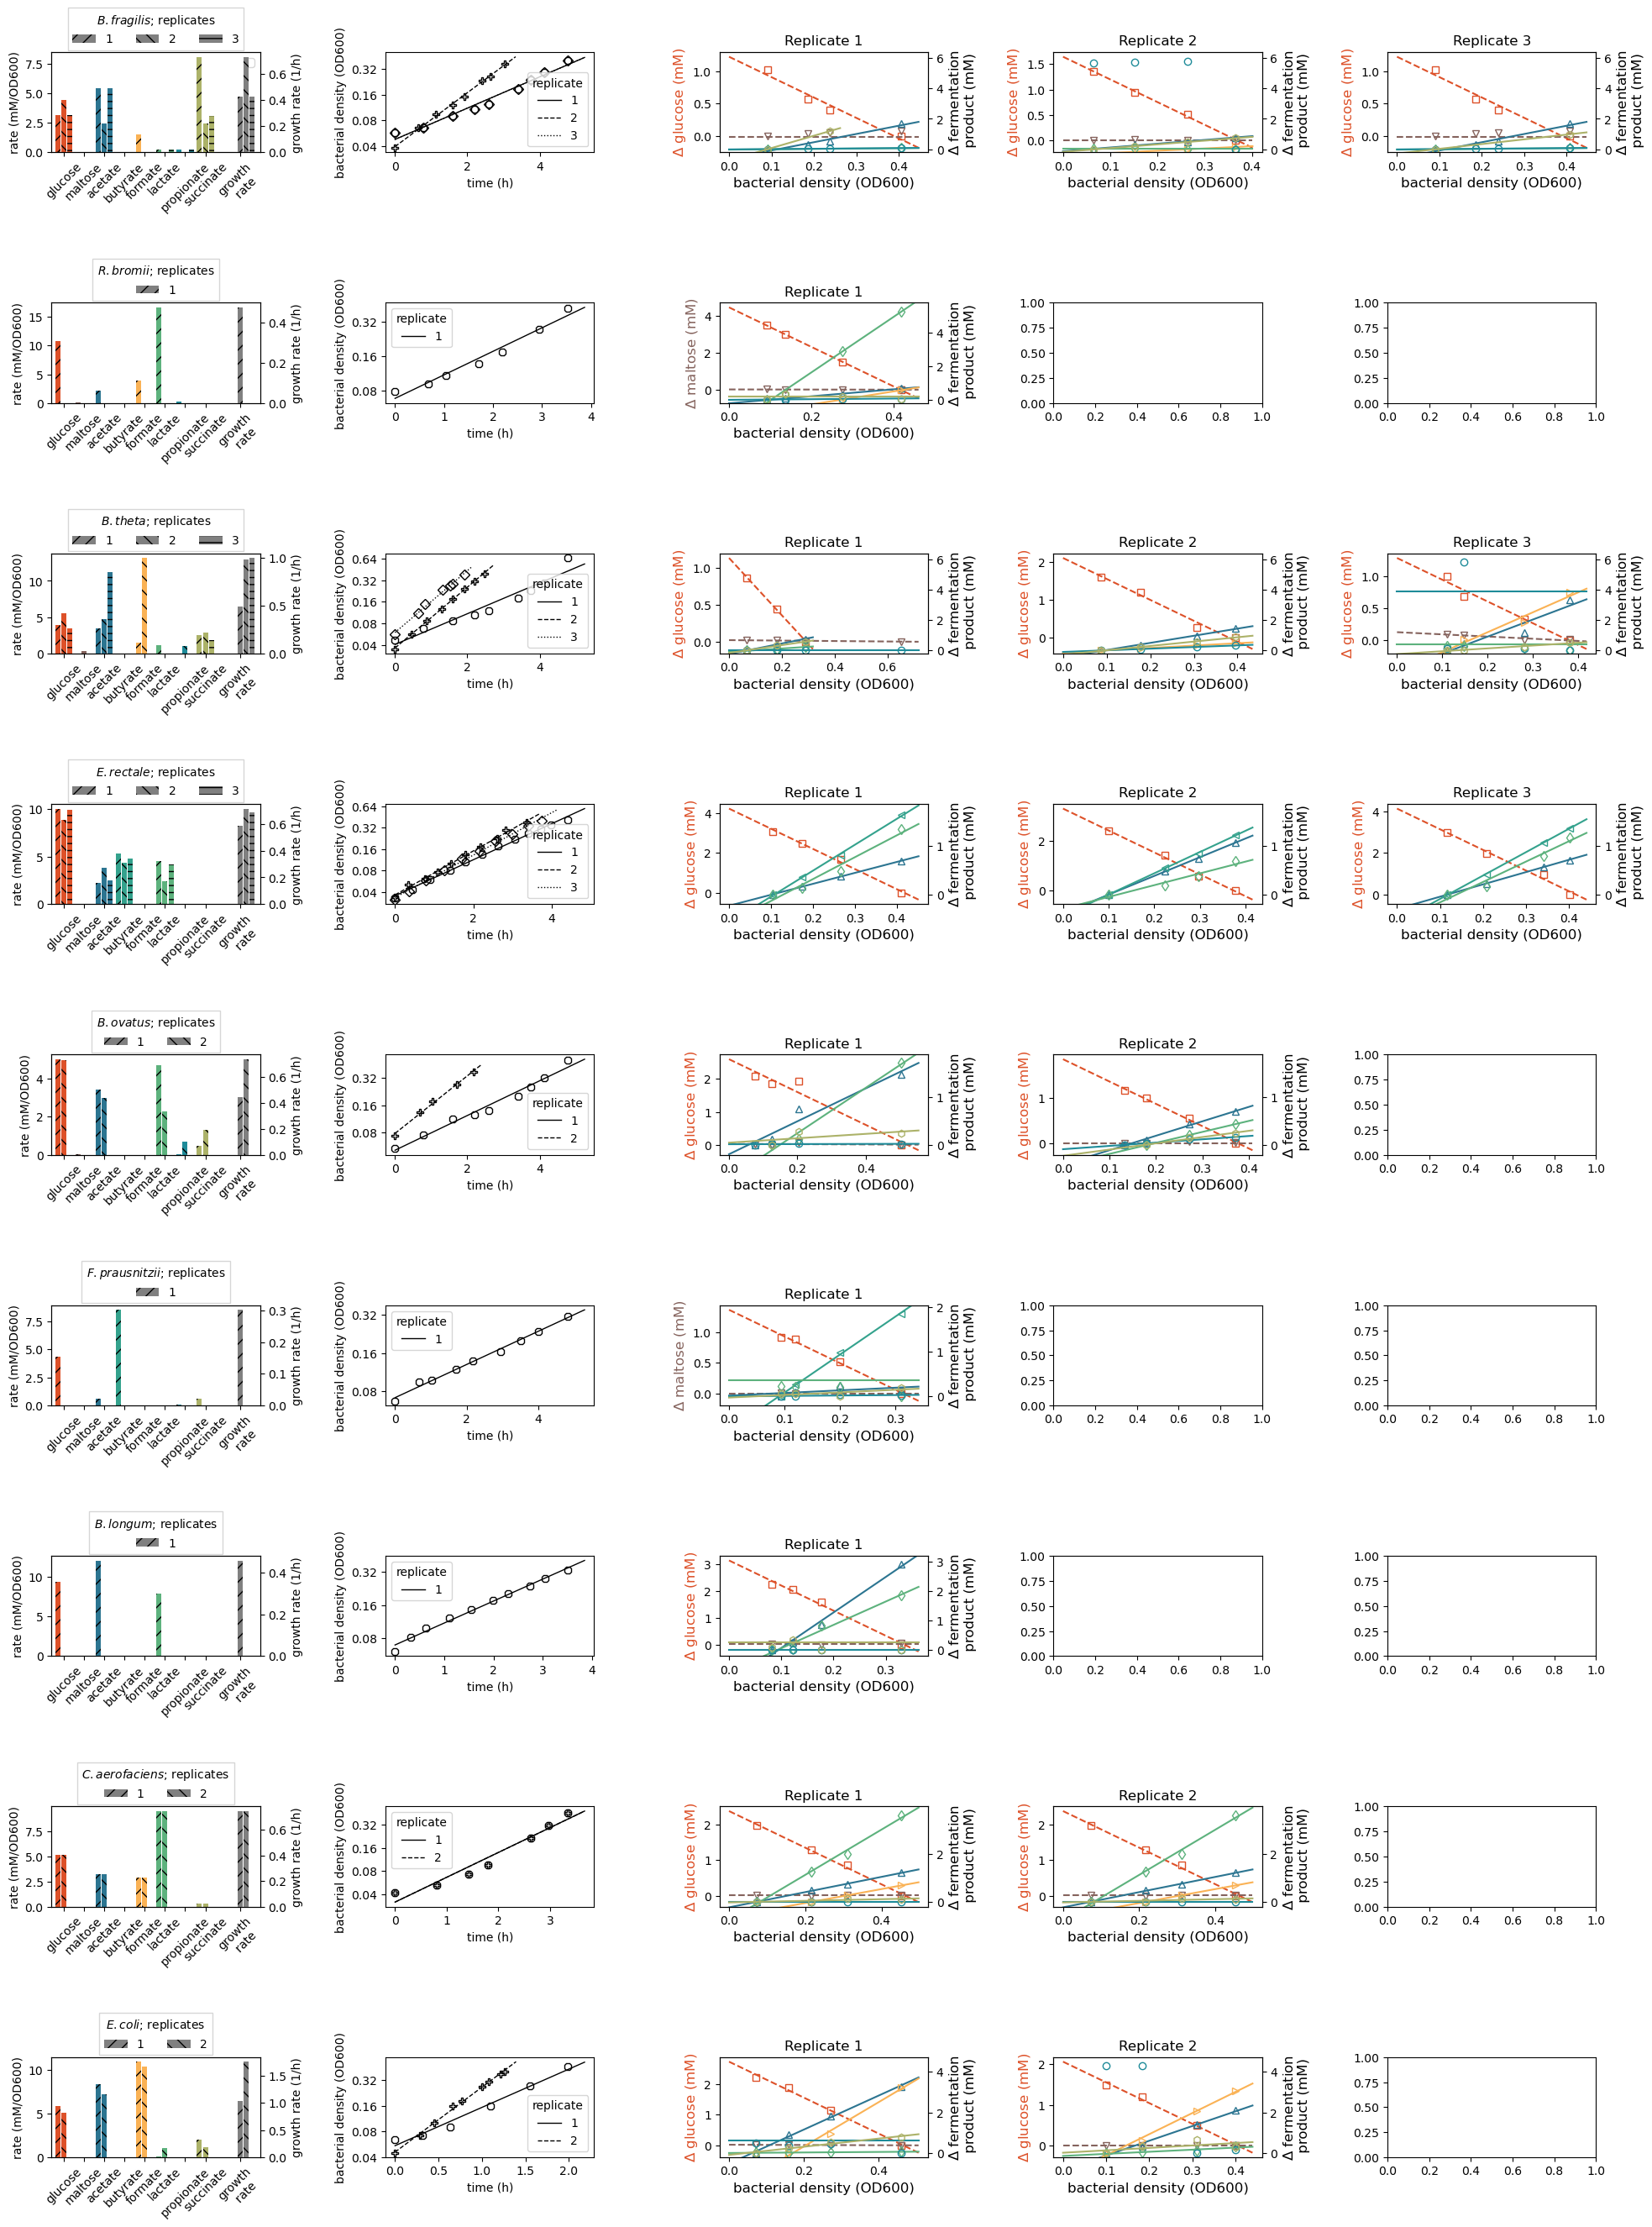

In [3]:

#plot concentration vs OD
####################

print(dataout_av["medium"].unique())
for medium in media:
    print(medium)
    display(dataout_av)
    select=dataout_av.loc[(dataout_av["use_in_study"]=="yes") & (dataout_av["experiment_short"]!="av") &  (dataout_av["medium"]==medium) ]
    display(select)

    select=select.sort_values(by=["strain"])

    strains=select["strain"].unique()
    num_strains=len(strains)

    if num_strains>0:
        #for index,row in select.iterrows():

        fontsize=12
        fig, ax = plt.subplots(num_strains,5,figsize=(5*4,3*num_strains))  #for barplots yields/excretion
        if num_strains==1:
            fig, ax = plt.subplots(2,5,figsize=(5*4,3*2))  #for barplots yields/excretion
        #print(index)
        #energycontent=np.array([0.68,0.21,0.37,.36,.33,0.52,0,0.33]) #kcal/mmol #the energy per mm for different fermentation products3


        markerlistgr=["8","P","D"]
        linestylegr=["-","--",":"]
        hatch=["//","\\\\","--"]
        #sublistshort=['glu','ace','pro','suc','lac','but','for','mal']
        #colorlist=['b','#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d']
        # sublist=['glucose','acetate','propionate','succinate','lactate','butyrate','formate']
        iS=-1
        for strain in strains:




            FPvalues=[]
            iS=iS+1
            results=[[],[],[],[],[],[],[],[]]

            select2=select.loc[select["strain"]==strain]

            specieslistcc=select2["species"].tolist()[0]


            print("********** Strain:")
            print(strain)
            #display(select2)

            gr=[]


            axTW=[]
            #go through all repeats of strains
            iA=-1
            for index,row in select2.iterrows():
                iA=iA+1

                #prepare plot
                if iA<3:
                    axTW.append(ax[iS,iA+2].twinx())
                    if strain in ["DSM17677","ATCC27255"]:
                        ax[iS,iA+2].set_ylabel("$\Delta $ maltose (mM)",fontsize=fontsize,color='#85635d')
                    else:
                        ax[iS,iA+2].set_ylabel("$\Delta $ glucose (mM)",fontsize=fontsize,color='#dd5129')
                    axTW[iA].set_ylabel("$\Delta $ fermentation\n product (mM)",fontsize=fontsize)
                    ax[iS,iA+2].set_xlabel("bacterial density (OD600)",fontsize=fontsize)

                    #plot OD
                    gr.append(row["growth_rate"])

                    try:
                        odcc=row["growthcurve_OD"][1:-1].split(",")
                        timecc=row["growthcurve_time"][1:-1].split(",")
                        print(odcc)
                        print(timecc)
                        odcc=np.array(odcc,dtype=float)
                        timecc=np.array(timecc,dtype=float)

                        odcc = odcc[~np.isnan(timecc)]
                        timecc = timecc[~np.isnan(timecc)]
                        timecc = timecc[~np.isnan(odcc)]
                        odcc = odcc[~np.isnan(odcc)]

                        fitgr=np.polyfit(timecc,np.log(odcc),1)
                        odcc_range=np.linspace(0,np.nanmax(1.1*timecc),50)
                        ax[iS,1].plot(odcc_range,np.exp(odcc_range*fitgr[0]+fitgr[1]),ls=linestylegr[iA],label=iA+1,color="k",lw=1)
                        ax[iS,1].set_yscale("log")
                        ax[iS,1].minorticks_off()
                        ytickod=[0.04,0.08,0.16,0.32,0.64]
                        ax[iS,1].set_yticks(ytickod)
                        ax[iS,1].set_yticklabels(ytickod)
                        ax[iS,1].plot(timecc,odcc,ls='',marker=markerlistgr[iA],color='k',fillstyle="none")
                    except:
                        print("no growth rate data")


                #go through different substrates
                ic=-1
                for sub in sublist:
                    #print(sub)
                    ic=ic+1
                    cfactor=cfactorlist[ic]
                    color=colorlist[ic]
                    label=sublistshort[ic]
                    conversionfactor=1/0.5
                    #print("OD")
                    #print(row[sub+"_OD"])



                    #print(row[sub+"_conc"])
                    if row[sub+"_OD"] in ["nan",np.nan]:
                        pass
                    else:
                        odc=row[sub+"_OD"].replace("[","").replace("]","").replace("  "," ").replace("  "," ").strip().split(" ")
                        concc=row[sub+"_conc"].replace("[","").replace("]","").replace("  "," ").replace("  "," ").strip().split(" ")
                        odc=np.array(odc,dtype=float)
                        concc=np.array(concc,dtype=float)
                        odcval=np.linspace(0,1.1*np.nanmax(odc),10)
                        m=row[sub]
                        y0=row[sub+"_y0"]

                        if sub not in ["glucose","maltose"]:
                            FPvalues.append(np.nanmax(concc)-concc.min())

                        if iA<3:
                            #ax[iS,iA+2].set_title(row['species']+" "+row['strain']+"; "+row['medium']+"; exp: "+str(row['exp_number'])+" ("+str(row['exp_number_usedonly'])+")")
                            if sub in ["glucose","maltose"]: # and (strain not in ["DSM17677","ATCC27255"]):
                                ax[iS,iA+2].plot(odc,concc-concc.min(),color=color,ls='',marker=markerlist[ic],fillstyle="none")
                                ax[iS,iA+2].plot(odcval,odcval*m+y0-concc.min(),color=color,label=label,ls='--')
                                results[ic].append(-1*m)
                            #elif sub in ["glucose"] and (strain  in ["DSM17677","ATCC27255"]):
                            #    results[ic].append(np.nan)
                            #elif sub in ["maltose"] and (strain in ["DSM17677","ATCC27255"]):
                            #    ax[iS,iA+2].plot(odc,concc-concc.min(),color=color,ls='',marker=markerlist[ic],fillstyle="none")
                            #    ax[iS,iA+2].plot(odcval,odcval*m+y0-concc.min(),color=color,label=label,ls='--')
                            #    results[ic].append(-1*m)
                            #elif sub in ["maltose"] and (strain not in ["DSM17677","ATCC27255"]):
                            #    results[ic].append(np.nan)
                            else:
                                #if m>0.5:
                                    axTW[iA].plot(odc,concc-concc.min(),color=color,ls='',marker=markerlist[ic],fillstyle="none")
                                    axTW[iA].plot(odcval,odcval*m+y0-concc.min(),color=color,label=label,ls='-')
                                    results[ic].append(m)
                                #else:
                                #    results[ic].append(np.nan)
                            if ic==0:
                                ax[iS,iA+2].set_title("Replicate "+str(iA+1))


            ax[iS,1].legend(title="replicate")
            print(results)

            iA=-1
            for index,row in select2.iterrows():
                iA=iA+1
                if iA<3:
                    try:
                        axTW[iA].set_ylim(-.2,1.1*max(FPvalues))
                    except:
                        pass
                #if iA==0:
                #    ax[0].set_yticklabels(tickl[::-1],fontsize=fontsize)
            ic=-1
            for sub in sublist:
                #print(sub)
                ic=ic+1
                for iR in [0,1,2]:
                    #print(results)
                    try:
                        ax[iS,0].bar(ic+iR*0.3,results[ic][iR],width=0.25,color=colorlist[ic],hatch=hatch[iR])
                    except:
                        #ax[iS,0].bar(ic+iR*0.3,results[ic][iR],width=0.25,color=colorlist[ic])
                        pass
                    #ax[iS,0].bar(ic+iR*0.3,results[ic][iR]

            axGR=ax[iS,0].twinx()
            axGR.set_ylabel("growth rate (1/h)")
            for iR in [0,1,2]:
                    #print(results)
                    try:
                        axGR.bar(9+iR*0.3,gr[iR],width=0.25,color="gray",hatch=hatch[iR],label=iR+1)
                    except:
                        #ax[iS,0].bar(ic+iR*0.3,results[ic][iR],width=0.25,color=colorlist[ic])
                        pass
            #axGR.legend(title="replicate")
            ax[iS,0].set_xlim(-0.3,10)
            listxt=np.array(range(0,8))+0.3
            ax[iS,0].set_xticks(listxt.tolist()+[9])
            ax[iS,0].set_xticklabels(sublist+["growth\n rate"],rotation=45) # sublistshort
            ax[iS,0].set_ylabel("rate (mM/OD600)")

            axGR.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
                  ncol=3, fancybox=False, shadow=False,title="$"+specieslistcc.replace(".",". ")+"$"+"; replicates")

            #ax[iS,1].set_xlim(-0.3,8)
            #ax[iS,1].set_xticks(np.array(range(0,8))+0.3)
            #ax[iS,1].set_xticklabels(sublistshort)
            ax[iS,1].set_ylabel("bacterial density (OD600)")
            ax[iS,1].set_xlabel("time (h)")

        ax[0,0].legend()
        plt.tight_layout()
        fig.savefig("plot_output_figure1/summary_hplcresults"+medium+".pdf")
        plt.show()

In [4]:
# Plot scatter plots comparing different media



Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  notes    strain     species  \
64             64          64.0       144.0    NaN  DSM 1447  B.vulgatus   
173           173           NaN         NaN    NaN  DSM 1447  B.vulgatus   
172           172           NaN         NaN    NaN  DSM 1447  B.vulgatus   
171           171           NaN         NaN    NaN  DSM 1447  B.vulgatus   
65             65          65.0        16.0    NaN  DSM 1447  B.vulgatus   

                                            experiment  \
64                                                 NaN   
173              av [204, 205]_used_only: [60.0, 67.0]   
172  av [201, 200, 119, 170, 118]_used_only: [57.0,...   
171  av [19, 183, 182, 11]_used_only: [59.0, 64.0, ...   
65                      analysis_stan_YCA_230607_2.5mM   

                   experiment_short                    exp_number medium  ...  \
64                 stan_BHI_30Dec22                           200    BHI  ...   
173                              av  av_B.vulgatus_DSM 1447_gamma  gamma  ...   
172                              av    av_B.vulgatus_DSM 1447_BHI    BHI  ...   
171                              av    av_B.vulgatus_DSM 1447_YCA    YCA  ...   
65   analysis_stan_YCA_230607_2.5mM                            19    YCA  ...   

    succinate_std  lactate_std  butyrate_std formate_std maltose_std  \
64            NaN          NaN           NaN         NaN         NaN   
173      0.240028     0.070391           0.0    0.000000         NaN   
172      0.632375     6.156752           0.0    3.356404    0.065167   
171      0.444575     0.103855           0.0    0.740572    0.000000   
65            NaN          NaN           NaN         NaN         NaN   

    total_ferm  total_ferm_std  total_uptake  total_uptake_std  \
64         NaN             NaN           NaN               NaN   
173   6.217655        0.188644           NaN               NaN   
172  15.126920        5.463276     -3.551213          1.597544   
171  11.636814        0.364322     -5.365080          0.437954   
65         NaN             NaN           NaN               NaN   

     growth_rate_std  
64               NaN  
173         0.053328  
172         0.499914  
171         0.187704  
65               NaN  

[5 rows x 64 columns]

epsilon


Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
exp_number                                                                  
av_B.fragilis_ATCC25285_epsilon             159           NaN         NaN   
av_B.ovatus_ATCC8483_epsilon                165           NaN         NaN   
av_B.theta_ATCC29148_epsilon                169           NaN         NaN   
av_E.rectale_ATCC33656_epsilon              183           NaN         NaN   
av_F.prausnitzii_DSM17677_epsilon           186           NaN         NaN   
av_R.bromii_ATCC27255_epsilon               191           NaN         NaN   
av_B.longum_DSM20219_epsilon                162           NaN         NaN   
av_C.aerofaciens_DSM3979_epsilon            176           NaN         NaN   
av_E.coli_NCM3722_epsilon                   180           NaN         NaN   

                                   notes     strain        species  \
exp_number                                                           
av_B.fragilis_ATCC25285_epsilon      NaN  ATCC25285     B.fragilis   
av_B.ovatus_ATCC8483_epsilon         NaN   ATCC8483       B.ovatus   
av_B.theta_ATCC29148_epsilon         NaN  ATCC29148        B.theta   
av_E.rectale_ATCC33656_epsilon       NaN  ATCC33656      E.rectale   
av_F.prausnitzii_DSM17677_epsilon    NaN   DSM17677  F.prausnitzii   
av_R.bromii_ATCC27255_epsilon        NaN  ATCC27255       R.bromii   
av_B.longum_DSM20219_epsilon         NaN   DSM20219       B.longum   
av_C.aerofaciens_DSM3979_epsilon     NaN    DSM3979  C.aerofaciens   
av_E.coli_NCM3722_epsilon            NaN    NCM3722         E.coli   

                                                                          experiment  \
exp_number                                                                             
av_B.fragilis_ATCC25285_epsilon     av [174, 151, 102]_used_only: [13.0, 15.0, 21.0]   
av_B.ovatus_ATCC8483_epsilon                   av [175, 157]_used_only: [28.0, 32.0]   
av_B.theta_ATCC29148_epsilon       av [65, 66, 67, 176, 153, 64, 104, 63, 62]_use...   
av_E.rectale_ATCC33656_epsilon     av [76, 75, 74, 73, 71, 77, 70, 69, 68, 72, 82...   
av_F.prausnitzii_DSM17677_epsilon                        av [161]_used_only: [115.0]   
av_R.bromii_ATCC27255_epsilon                            av [164]_used_only: [134.0]   
av_B.longum_DSM20219_epsilon                              av [156]_used_only: [22.0]   
av_C.aerofaciens_DSM3979_epsilon               av [105, 177]_used_only: [69.0, 71.0]   
av_E.coli_NCM3722_epsilon                      av [150, 162]_used_only: [76.0, 77.0]   

                                  experiment_short   medium experimentator  \
exp_number                                                                   
av_B.fragilis_ATCC25285_epsilon                 av  epsilon            NaN   
av_B.ovatus_ATCC8483_epsilon                    av  epsilon            NaN   
av_B.theta_ATCC29148_epsilon                    av  epsilon            NaN   
av_E.rectale_ATCC33656_epsilon                  av  epsilon            NaN   
av_F.prausnitzii_DSM17677_epsilon               av  epsilon            NaN   
av_R.bromii_ATCC27255_epsilon                   av  epsilon            NaN   
av_B.longum_DSM20219_epsilon                    av  epsilon            NaN   
av_C.aerofaciens_DSM3979_epsilon                av  epsilon            NaN   
av_E.coli_NCM3722_epsilon                       av  epsilon            NaN   

                                   ...  succinate_std  lactate_std  \
exp_number                         ...                               
av_B.fragilis_ATCC25285_epsilon    ...       3.087290     0.135979   
av_B.ovatus_ATCC8483_epsilon       ...       0.591842     1.718142   
av_B.theta_ATCC29148_epsilon       ...       0.711669     0.540779   
av_E.rectale_ATCC33656_epsilon     ...       0.000000     0.698724   
av_F.prausnitzii_DSM17677_epsilon  ...            NaN          NaN   
av_R.bromii_ATCC27255_epsilon      ...            NaN          NaN   
av_B.longum_DSM20219_epsilon

/var/folders/4b/8dffvbfs5qs93rh77f2zxs340000gn/T/ipykernel_92615/2147664257.py:149: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.8.
  ax[2].barh(straincount-0.2,cfactor*datacur.at[index,sub]*conversionfactor,left=basec,color=color,label=label,height=0.4,hatch='\\\\\ ')
/Users/jonascremer/mambaforge/envs/ete/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1103: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
/Users/jonascremer/mambaforge/envs/ete/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1104: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])


9


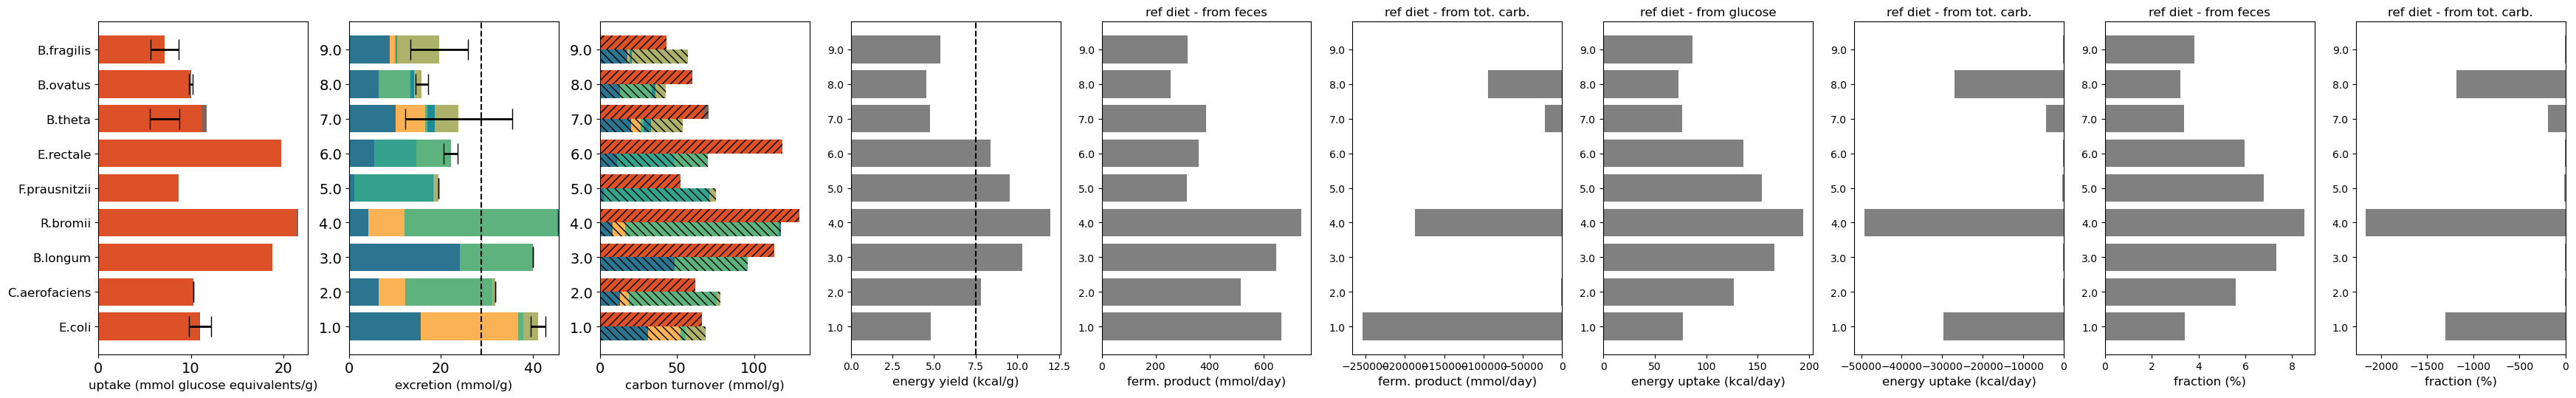

gamma


Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  notes  \
exp_number                                                                     
av_B.vulgatus_DSM 1447_gamma            173           NaN         NaN    NaN   
av_B.fragilis_ATCC25285_gamma           158           NaN         NaN    NaN   
av_B.theta_ATCC29148_gamma              168           NaN         NaN    NaN   
av_E.coli_NCM3722_gamma                 179           NaN         NaN    NaN   

                                  strain     species  \
exp_number                                             
av_B.vulgatus_DSM 1447_gamma    DSM 1447  B.vulgatus   
av_B.fragilis_ATCC25285_gamma  ATCC25285  B.fragilis   
av_B.theta_ATCC29148_gamma     ATCC29148     B.theta   
av_E.coli_NCM3722_gamma          NCM3722      E.coli   

                                                                      experiment  \
exp_number                                                                         
av_B.vulgatus_DSM 1447_gamma               av [204, 205]_used_only: [60.0, 67.0]   
av_B.fragilis_ATCC25285_gamma              av [113, 147]_used_only: [12.0, 19.0]   
av_B.theta_ATCC29148_gamma      av [115, 203, 202]_used_only: [46.0, 48.0, 51.0]   
av_E.coli_NCM3722_gamma        av [146, 207, 206, 112]_used_only: [81.0, 83.0...   

                              experiment_short medium experimentator  ...  \
exp_number                                                            ...   
av_B.vulgatus_DSM 1447_gamma                av  gamma            NaN  ...   
av_B.fragilis_ATCC25285_gamma               av  gamma            NaN  ...   
av_B.theta_ATCC29148_gamma                  av  gamma            NaN  ...   
av_E.coli_NCM3722_gamma                     av  gamma            NaN  ...   

                               succinate_std  lactate_std butyrate_std  \
exp_number                                                               
av_B.vulgatus_DSM 1447_gamma        0.240028     0.070391          0.0   
av_B.fragilis_ATCC25285_gamma       0.131018     0.299771          0.0   
av_B.theta_ATCC29148_gamma          0.172813     1.095500          0.0   
av_E.coli_NCM3722_gamma             0.141871     0.179215          0.0   

                              formate_std maltose_std  total_ferm  \
exp_number                                                          
av_B.vulgatus_DSM 1447_gamma     0.000000         NaN    6.217655   
av_B.fragilis_ATCC25285_gamma    2.215931         NaN   11.018364   
av_B.theta_ATCC29148_gamma       0.900057         NaN   21.628412   
av_E.coli_NCM3722_gamma          1.740448         NaN   36.982393   

                               total_ferm_std  total_uptake  total_uptake_std  \
exp_number                                                                      
av_B.vulgatus_DSM 1447_gamma         0.188644           NaN               NaN   
av_B.fragilis_ATCC25285_gamma        2.910421     -7.534573               NaN   
av_B.theta_ATCC29148_gamma           2.444916     -5.908203               NaN   
av_E.coli_NCM3722_gamma              2.023836    -10.867657               NaN   

                               growth_rate_std  
exp_number                                      
av_B.vulgatus_DSM 1447_gamma          0.053328  
av_B.fragilis_ATCC25285_gamma         0.067995  
av_B.theta_ATCC29148_gamma            0.094339  
av_E.coli_NCM3722_gamma               0.146521  

[4 rows x 63 columns]

/var/folders/4b/8dffvbfs5qs93rh77f2zxs340000gn/T/ipykernel_92615/2147664257.py:149: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.8.
  ax[2].barh(straincount-0.2,cfactor*datacur.at[index,sub]*conversionfactor,left=basec,color=color,label=label,height=0.4,hatch='\\\\\ ')
/Users/jonascremer/mambaforge/envs/ete/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1103: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
/Users/jonascremer/mambaforge/envs/ete/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1104: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])


4


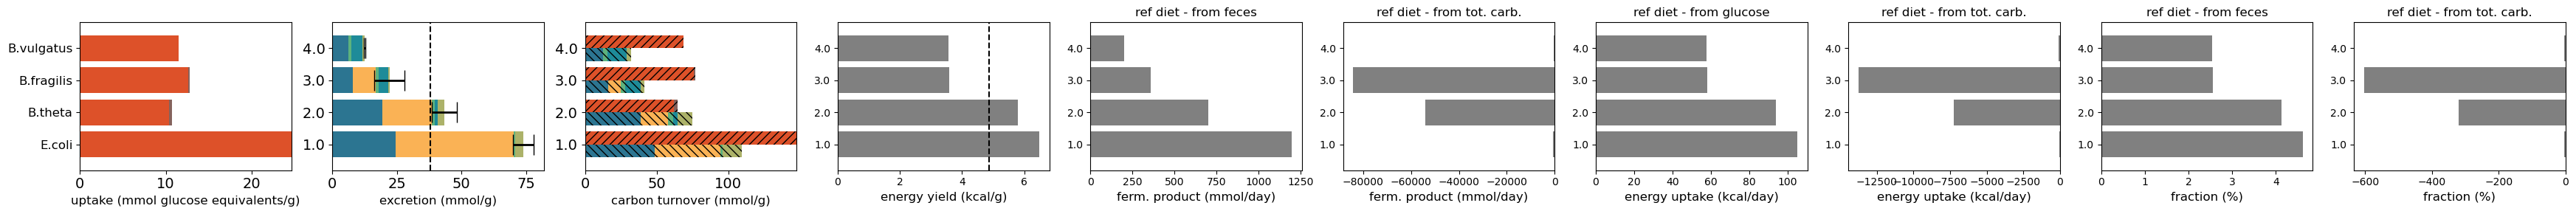

BHI


Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  notes  \
exp_number                                                                      
av_B.vulgatus_DSM 1447_BHI               172           NaN         NaN    NaN   
av_B.fragilis_ATCC25285_BHI              157           NaN         NaN    NaN   
av_B.ovatus_ATCC8483_BHI                 164           NaN         NaN    NaN   
av_B.theta_ATCC29148_BHI                 167           NaN         NaN    NaN   
av_B.finegoldii_HM-727_BHI               155           NaN         NaN    NaN   
av_P.distastonis_HM-169_BHI              189           NaN         NaN    NaN   
av_E.rectale_ATCC33656_BHI               182           NaN         NaN    NaN   
av_R.intestinalis_DSM14610_BHI           193           NaN         NaN    NaN   
av_F.prausnitzii_DSM17677_BHI            185           NaN         NaN    NaN   
av_B.longum_DSM20219_BHI                 161           NaN         NaN    NaN   
av_B.adolescentis_DSM20083_BHI           153           NaN         NaN    NaN   
av_C.aerofaciens_DSM3979_BHI             175           NaN         NaN    NaN   
av_E.coli_NCM3722_BHI                    178           NaN         NaN    NaN   

                                   strain         species  \
exp_number                                                  
av_B.vulgatus_DSM 1447_BHI       DSM 1447      B.vulgatus   
av_B.fragilis_ATCC25285_BHI     ATCC25285      B.fragilis   
av_B.ovatus_ATCC8483_BHI         ATCC8483        B.ovatus   
av_B.theta_ATCC29148_BHI        ATCC29148         B.theta   
av_B.finegoldii_HM-727_BHI         HM-727    B.finegoldii   
av_P.distastonis_HM-169_BHI        HM-169   P.distastonis   
av_E.rectale_ATCC33656_BHI      ATCC33656       E.rectale   
av_R.intestinalis_DSM14610_BHI   DSM14610  R.intestinalis   
av_F.prausnitzii_DSM17677_BHI    DSM17677   F.prausnitzii   
av_B.longum_DSM20219_BHI         DSM20219        B.longum   
av_B.adolescentis_DSM20083_BHI   DSM20083  B.adolescentis   
av_C.aerofaciens_DSM3979_BHI      DSM3979   C.aerofaciens   
av_E.coli_NCM3722_BHI             NCM3722          E.coli   

                                                                       experiment  \
exp_number                                                                          
av_B.vulgatus_DSM 1447_BHI      av [201, 200, 119, 170, 118]_used_only: [57.0,...   
av_B.fragilis_ATCC25285_BHI                 av [195, 194]_used_only: [14.0, 16.0]   
av_B.ovatus_ATCC8483_BHI         av [168, 190, 191]_used_only: [29.0, 33.0, 34.0]   
av_B.theta_ATCC29148_BHI         av [169, 188, 189]_used_only: [43.0, 52.0, 53.0]   
av_B.finegoldii_HM-727_BHI         av [116, 166, 117]_used_only: [6.0, 9.0, 10.0]   
av_P.distastonis_HM-169_BHI     av [173, 122, 172, 123]_used_only: [126.0, 127...   
av_E.rectale_ATCC33656_BHI      av [197, 196, 109, 138, 137, 108]_used_only: [...   
av_R.intestinalis_DSM14610_BHI  av [110, 143, 111]_used_only: [137.0, 142.0, 1...   
av_F.prausnitzii_DSM17677_BHI   av [121, 139, 141, 120]_used_only: [116.0, 117...   
av_B.longum_DSM20219_BHI                    av [193, 192]_used_only: [23.0, 24.0]   
av_B.adolescentis_DSM20083_BHI                av [198, 199]_used_only: [4.0, 5.0]   
av_C.aerofaciens_DSM3979_BHI                av [140, 142]_used_only: [68.0, 70.0]   
av_E.coli_NCM3722_BHI            av [187, 186, 171]_used_only: [78.0, 79.0, 80.0]   

                               experiment_short medium experimentator  ...  \
exp_number                                                             ...   
av_B.vulgatus_DSM 1447_BHI                   av    BHI            NaN  ...   
av_B.fragilis_ATCC25285_BHI                  av    BHI            NaN  ...   
av_B.ovatus_ATCC8483_BHI                     av    BHI            NaN  ...   
av_B.theta_ATCC29148_BHI                     av    BHI            NaN  ...   
av_B.finegoldii_HM-727_BHI                   av    BHI            NaN  ...   
av_P.distastonis_HM-169_BHI                  av    BHI            NaN  ...   


/var/folders/4b/8dffvbfs5qs93rh77f2zxs340000gn/T/ipykernel_92615/2147664257.py:149: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.8.
  ax[2].barh(straincount-0.2,cfactor*datacur.at[index,sub]*conversionfactor,left=basec,color=color,label=label,height=0.4,hatch='\\\\\ ')


13


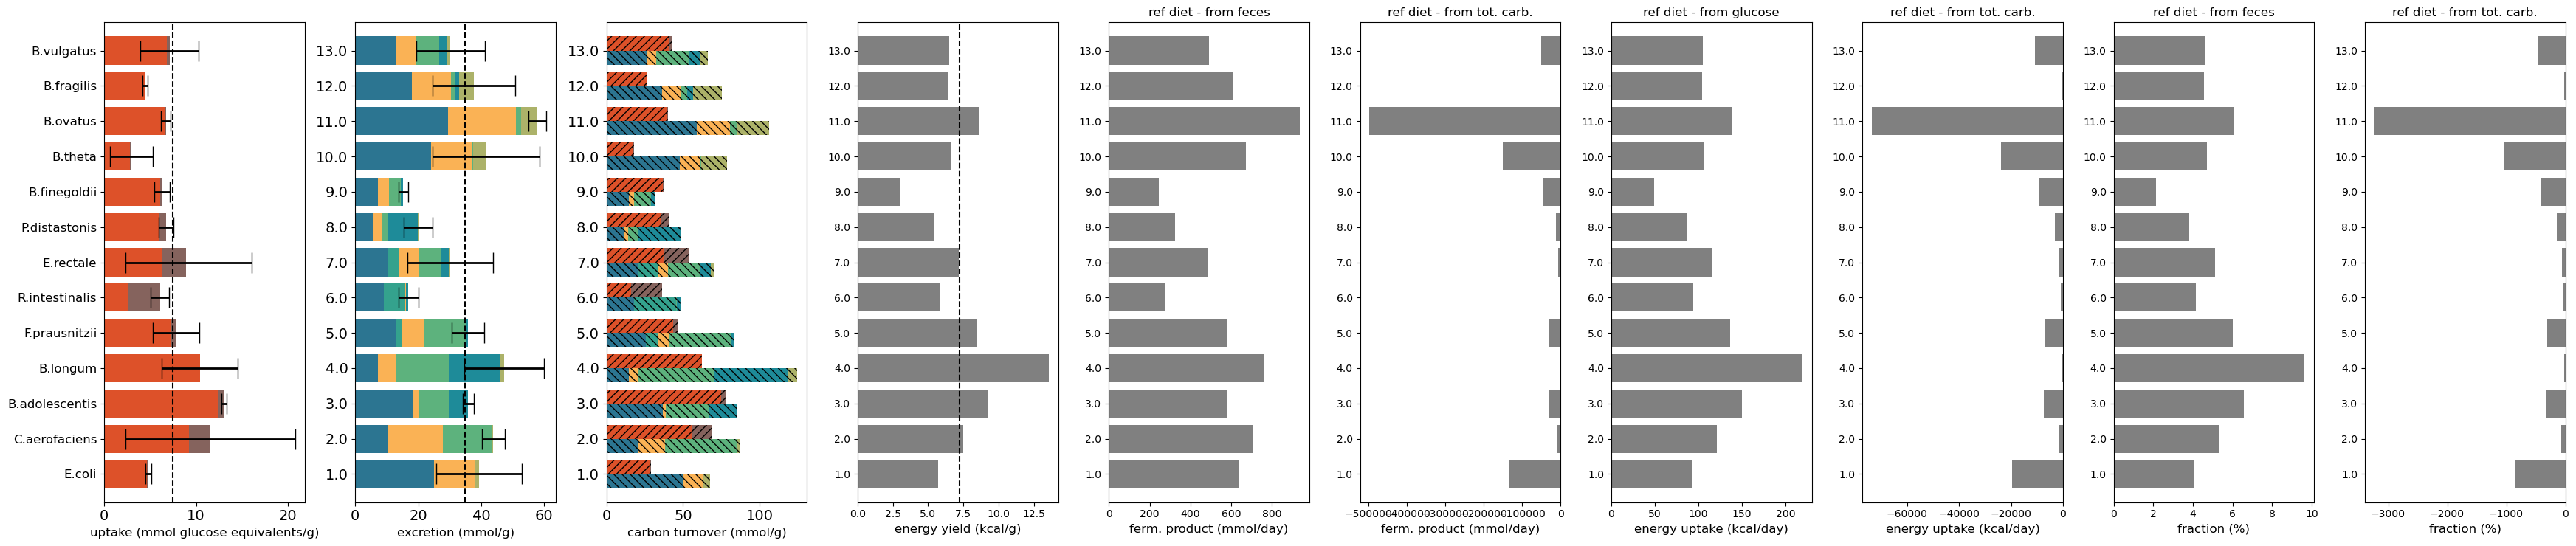

YCA


Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  notes  \
exp_number                                                                      
av_B.vulgatus_DSM 1447_YCA               171           NaN         NaN    NaN   
av_B.fragilis_ATCC25285_YCA              156           NaN         NaN    NaN   
av_B.ovatus_ATCC8483_YCA                 163           NaN         NaN    NaN   
av_B.theta_ATCC29148_YCA                 166           NaN         NaN    NaN   
av_B.finegoldii_HM-727_YCA               154           NaN         NaN    NaN   
av_B.uniformis_ATCC8492_YCA              170           NaN         NaN    NaN   
av_P.copri_DSM18205_YCA                  187           NaN         NaN    NaN   
av_P.distastonis_HM-169_YCA              188           NaN         NaN    NaN   
av_E.rectale_ATCC33656_YCA               181           NaN         NaN    NaN   
av_R.intestinalis_DSM14610_YCA           192           NaN         NaN    NaN   
av_F.prausnitzii_DSM17677_YCA            184           NaN         NaN    NaN   
av_R.bromii_ATCC27255_YCA                190           NaN         NaN    NaN   
av_B.longum_DSM20219_YCA                 160           NaN         NaN    NaN   
av_B.adolescentis_DSM20083_YCA           152           NaN         NaN    NaN   
av_C.aerofaciens_DSM3979_YCA             174           NaN         NaN    NaN   
av_E.coli_NCM3722_YCA                    177           NaN         NaN    NaN   

                                   strain         species  \
exp_number                                                  
av_B.vulgatus_DSM 1447_YCA       DSM 1447      B.vulgatus   
av_B.fragilis_ATCC25285_YCA     ATCC25285      B.fragilis   
av_B.ovatus_ATCC8483_YCA         ATCC8483        B.ovatus   
av_B.theta_ATCC29148_YCA        ATCC29148         B.theta   
av_B.finegoldii_HM-727_YCA         HM-727    B.finegoldii   
av_B.uniformis_ATCC8492_YCA      ATCC8492     B.uniformis   
av_P.copri_DSM18205_YCA          DSM18205         P.copri   
av_P.distastonis_HM-169_YCA        HM-169   P.distastonis   
av_E.rectale_ATCC33656_YCA      ATCC33656       E.rectale   
av_R.intestinalis_DSM14610_YCA   DSM14610  R.intestinalis   
av_F.prausnitzii_DSM17677_YCA    DSM17677   F.prausnitzii   
av_R.bromii_ATCC27255_YCA       ATCC27255        R.bromii   
av_B.longum_DSM20219_YCA         DSM20219        B.longum   
av_B.adolescentis_DSM20083_YCA   DSM20083  B.adolescentis   
av_C.aerofaciens_DSM3979_YCA      DSM3979   C.aerofaciens   
av_E.coli_NCM3722_YCA             NCM3722          E.coli   

                                                                       experiment  \
exp_number                                                                          
av_B.vulgatus_DSM 1447_YCA      av [19, 183, 182, 11]_used_only: [59.0, 64.0, ...   
av_B.fragilis_ATCC25285_YCA           av [17, 3, 4]_used_only: [17.0, 18.0, 20.0]   
av_B.ovatus_ATCC8483_YCA              av [7, 8, 18]_used_only: [30.0, 31.0, 35.0]   
av_B.theta_ATCC29148_YCA            av [53, 43, 35]_used_only: [45.0, 49.0, 50.0]   
av_B.finegoldii_HM-727_YCA              av [5, 6, 20]_used_only: [7.0, 8.0, 11.0]   
av_B.uniformis_ATCC8492_YCA         av [24, 23, 25]_used_only: [54.0, 55.0, 56.0]   
av_P.copri_DSM18205_YCA          av [26, 27, 29]_used_only: [120.0, 121.0, 122.0]   
av_P.distastonis_HM-169_YCA     av [13, 16, 12, 180]_used_only: [123.0, 124.0,...   
av_E.rectale_ATCC33656_YCA        av [39, 30, 36]_used_only: [88.0, 100.0, 103.0]   
av_R.intestinalis_DSM14610_YCA  av [31, 37, 47, 45]_used_only: [138.0, 139.0, ...   
av_F.prausnitzii_DSM17677_YCA    av [40, 48, 54]_used_only: [112.0, 113.0, 114.0]   
av_R.bromii_ATCC27255_YCA       av [21, 185, 184, 14, 15]_used_only: [131.0, 1...   
av_B.longum_DSM20219_YCA            av [41, 32, 38]_used_only: [25.0, 26.0, 27.0]   
av_B.adolescentis_DSM20083_YCA         av [51, 42, 33]_used_only: [1.0, 2.0, 3.0]   
av_C.aerofaciens_DSM3979_YCA    av [34, 50, 52, 49]_used_only: [72.0, 73.0, 74...   
av_E.coli_NCM3722_YCA        

/var/folders/4b/8dffvbfs5qs93rh77f2zxs340000gn/T/ipykernel_92615/2147664257.py:149: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.8.
  ax[2].barh(straincount-0.2,cfactor*datacur.at[index,sub]*conversionfactor,left=basec,color=color,label=label,height=0.4,hatch='\\\\\ ')


16


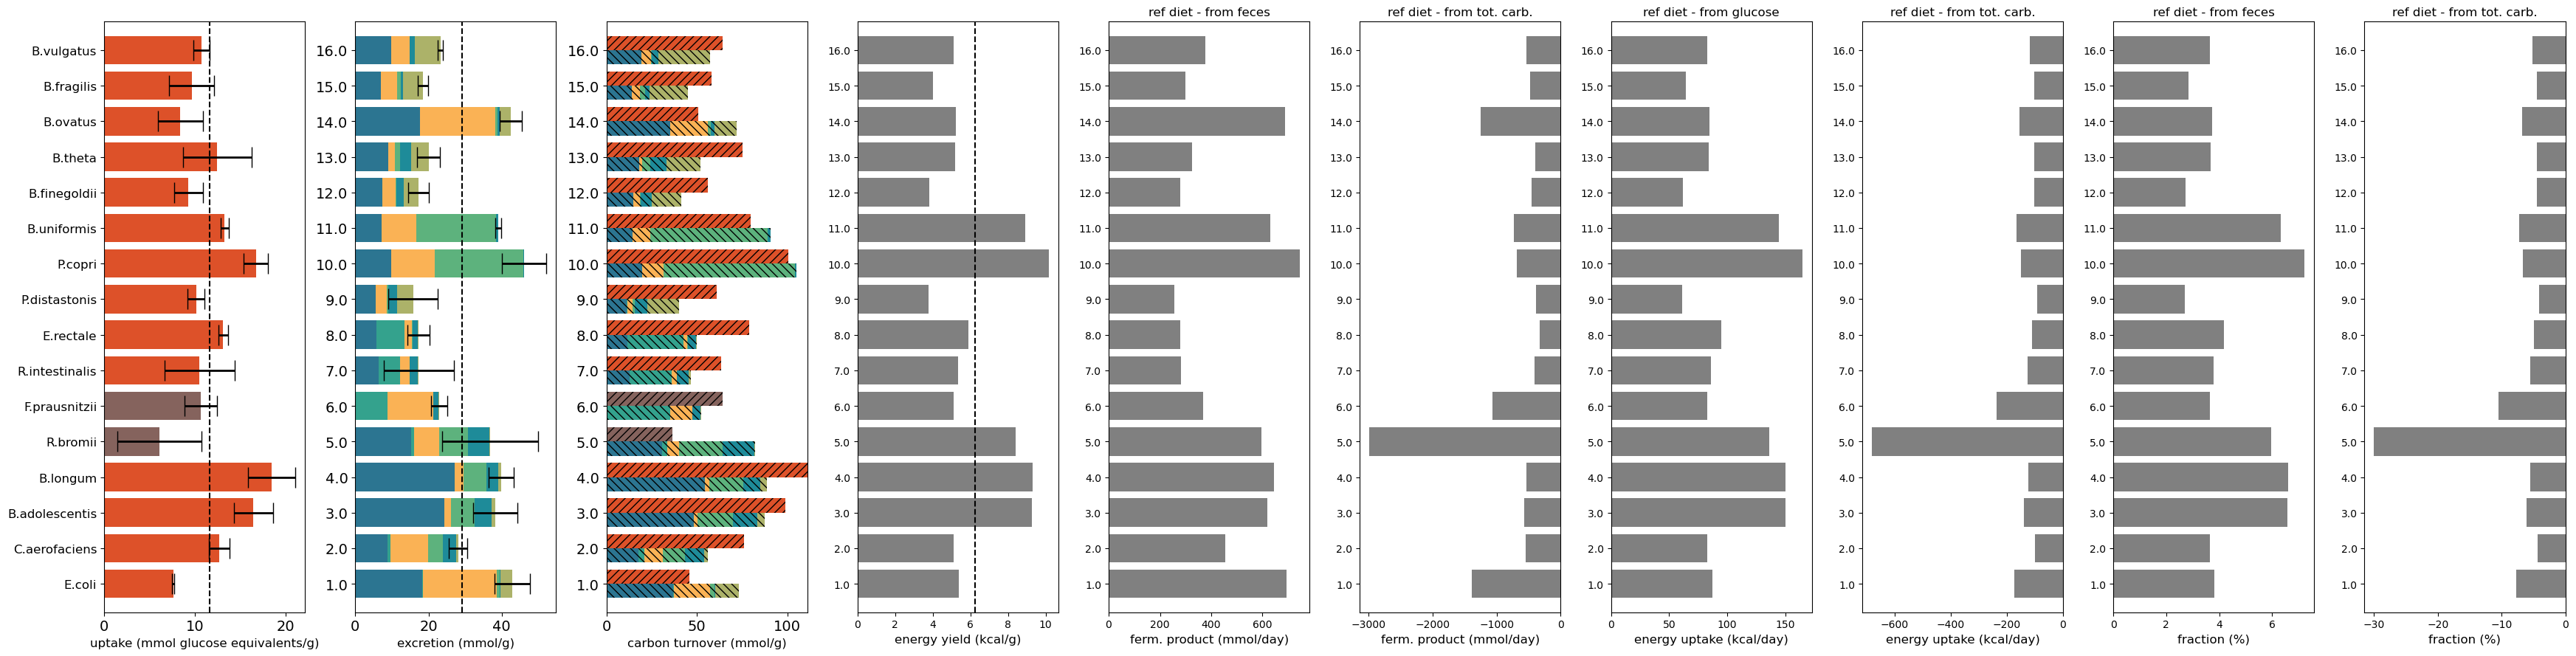

In [5]:
#plot bar diagrams - all repetitiosn in one plot
display(dataout_av.head())
#strainsunique=dataout['strain'].unique()
#display(strainsunique)
add_mean=False

#abundance to calculate average rates
abundance_different_strains=[15.5,3,1.9,1.9,0.4,9.2,6.8,2.2,2.1,2.1,9,0.8,0.4,0.2,0.2,1.6][::-1]
abundance_different_strains=np.array(abundance_different_strains)/(sum(abundance_different_strains))


# different media['BHI' 'YCA' 'epsilon plus' 'simple' 'epsilon' 'fecal']
conversionfactor=1/(0.5) #multiply by OD ml/0.5mg to change unti from mM to:   ml mM / mg which is l mM / g which is mmol/g
for cond in [1,3,4,5]:
    
    if cond==1: #plot average values for different strains
        condname="epsilon"
        exp_numberlist=samplenamelist[media.index("epsilon")][::-1]
    #elif cond==2:
    #    condname="fecal"
    #    exp_numberlist=samplenamelist[media.index("fecal")][::-1]
    elif cond==3:
        condname="gamma"
        exp_numberlist=samplenamelist[media.index("gamma")][::-1]
    elif cond==4:
        condname="BHI"
        exp_numberlist=samplenamelist[media.index("BHI")][::-1]
    elif cond==5:
        condname="YCA"
        exp_numberlist=samplenamelist[media.index("YCA")][::-1]
    
    print(condname)
    
    
    datacur=dataout_av.loc[dataout_av["exp_number"].isin(exp_numberlist)]
    datacur=datacur.set_index("exp_number")
    display(datacur)
    
    numexp=datacur.shape[0]
    fig, ax = plt.subplots(1,10,figsize=(35,1+0.5*numexp))  
    ax[0].set_xlabel("uptake (mmol glucose equivalents/g)",fontsize=fontsize)
    ax[1].set_xlabel("excretion (mmol/g)",fontsize=fontsize)
    ax[2].set_xlabel("carbon turnover (mmol/g)",fontsize=fontsize)
    ax[3].set_xlabel("energy yield (kcal/g)",fontsize=fontsize)
    ax[4].set_xlabel("ferm. product (mmol/day)",fontsize=fontsize)
    ax[5].set_xlabel("ferm. product (mmol/day)",fontsize=fontsize)
    ax[6].set_xlabel("energy uptake (kcal/day)",fontsize=fontsize)
    ax[7].set_xlabel("energy uptake (kcal/day)",fontsize=fontsize)
    ax[8].set_xlabel("fraction (%)",fontsize=fontsize)
    ax[9].set_xlabel("fraction (%)",fontsize=fontsize)

    
    for cc in range(0,10):
        ax[cc].set_yticks([-1.5,-0.5]+list(range(1,numexp+1)))
        if add_mean:
            ax[cc].set_ylim(-2,numexp+1)
            if cond==1:
                ax[cc].set_ylim(-3,numexp+3)
        else:
            ax[cc].set_ylim(0.2,numexp+1-0.2)
        straincount=0
    strainl=[]
    strainllabelbar=[]

    consumptionl=[]
    excretionl=[]
    energycontentl=[]
    
                    
    excretion_singlel=np.zeros([len(exp_numberlist),8])
    strainlist2=[]
    iS = -1

    mean_ut=[]
    mean_excretion=[]
    mean_ut_c=[]
    mean_excretion_c=[]
    
    for index in exp_numberlist:
                iS = iS+1
                #print(index)
                #print(datacur)
                straincount=straincount+1
                
                #excretionB=np.array([4.805,0,0,1.125,3.176]) #in mM/OD #the amount secreted for different fermentation prodiucts
                #excretionE=np.array([2.722,4.727,3.914,0,0]) #in mM/OD
                ic = -1
                base=0
                basec=0
                baseut=0
                basecut=0
                energy=0
                
                strainl.append(datacur.at[index,"strain"])
                strainlist2.append(datacur.at[index,"strain"])
                strainllabelbar.append(datacur.at[index,"species"])#+" "+datacur.at[index,"strain"])
                mean_excretion_singlestrain=0
                mean_excretion_singlestrain_c=0
                mean_uptake_singlestrain=0
                mean_uptake_singlestrain_c=0
                consumpc=0
                for sub in sublist:
                    ic=ic+1
                    cfactor=cfactorlist[ic]
                    color=colorlist[ic]
                    if straincount==1:
                        label=sublistshort[ic]
                    else:
                        label=None
                    
                    if sub in ["glucose"]:# and (strainl[-1] not in ["DSM17677","ATCC27255"]):
                        ax[0].barh(straincount,-1*datacur.at[index,sub]*conversionfactor,left=baseut,color=color,label=label,height=0.8)
                        ax[2].barh(straincount+0.2,-1*cfactor*datacur.at[index,sub]*conversionfactor,left=basecut,label=label,color=color,height=0.4,hatch='///')
                        
                        consumpc=consumpc-1*datacur.at[index,sub]*conversionfactor
                        
                        if datacur.at[index,sub]<0:
                            basecut=basec-cfactor*datacur.at[index,sub]*conversionfactor
                            baseut=base-datacur.at[index,sub]*conversionfactor
                        mean_uptake_singlestrain=mean_uptake_singlestrain-conversionfactor*datacur.at[index,sub]
                        mean_uptake_singlestrain_c=mean_uptake_singlestrain_c-cfactor*conversionfactor*datacur.at[index,sub]
               
                        #mean_ut.append(-conversionfactor*datacur.at[index,sub])
                        #mean_ut_c.append(-cfactor*conversionfactor*datacur.at[index,sub])
                        inverseyield=-1*baseut*0.18 #mmol/g bacteria *0.18 g glucose /mmol -> gram glucose/gram bacter
                        excretion_singlel[iS,ic] = -1*datacur.at[index,sub]*conversionfactor
                    
                    elif sub in ["maltose"]: #and (strainl[-1]  in ["DSM17677","ATCC27255"]):
                        ax[0].barh(straincount,-2*datacur.at[index,sub]*conversionfactor,left=baseut,color=color,label=label,height=0.8)
                        ax[2].barh(straincount+0.2,-1*cfactor*datacur.at[index,sub]*conversionfactor,left=basecut,label=label,color=color,height=0.4,hatch='///')
                        consumpc=consumpc-2*datacur.at[index,sub]*conversionfactor
                        
                        #mean_ut.append(-conversionfactor*datacur.at[index,sub])
                        #mean_ut_c.append(-cfactor*conversionfactor*datacur.at[index,sub])
                        mean_uptake_singlestrain=mean_uptake_singlestrain-conversionfactor*datacur.at[index,sub]
                        mean_uptake_singlestrain_c=mean_uptake_singlestrain_c-cfactor*conversionfactor*datacur.at[index,sub]
               
                        
                        if datacur.at[index,sub]<0:
                            basecut=basec-cfactor*datacur.at[index,sub]*conversionfactor
                            baseut=base-datacur.at[index,sub]*conversionfactor
                        
                        inverseyield=-1*baseut*0.18 #mmol/g bacteria *0.18 g glucose /mmol -> gram glucose/gram bacter
                        excretion_singlel[iS,ic] = -1*datacur.at[index,sub]*conversionfactor
                    
                    
                    else:# datacur.at[index,sub]>0.5: #for other fermentation products, require more than 0.5
                        ax[1].barh(straincount,datacur.at[index,sub]*conversionfactor,left=base,color=color,label=label,height=0.8)
                        ax[2].barh(straincount-0.2,cfactor*datacur.at[index,sub]*conversionfactor,left=basec,color=color,label=label,height=0.4,hatch='\\\\\ ')
                        
                        basec=basec+cfactor*datacur.at[index,sub]*conversionfactor
                        base=base+datacur.at[index,sub]*conversionfactor
                        energy=energy+datacur.at[index,sub]*conversionfactor*energycontent[ic] #unit mmol/g *energycontent (unit kcal/mmol)
                        excretion_singlel[iS,ic] = datacur.at[index,sub]*conversionfactor
                        if datacur.at[index,sub]>0:
                            mean_excretion_singlestrain=mean_excretion_singlestrain+datacur.at[index,sub]*conversionfactor
                            mean_excretion_singlestrain_c=mean_excretion_singlestrain_c+datacur.at[index,sub]*conversionfactor*cfactor
                consumptionl.append(consumpc)
                    #consumptionl.append(-1*datacur.at[index,sub]*conversionfactor)
                        
                    #else:
                    #    lkjljk
                    #    print("value does not make sense")
                    #    print(strainl[-1])
                    #    print(sub)
                    #    print(datacur.at[index,sub])
                #plot total uptake and total secrection
                ax[0].errorbar(conversionfactor*datacur.at[index,"total_uptake"]*(-1),straincount,xerr=conversionfactor*datacur.at[index,"total_uptake_std"],color='k',capsize=10, elinewidth=2)
                ax[1].errorbar(conversionfactor*datacur.at[index,"total_ferm"],straincount,xerr=conversionfactor*datacur.at[index,"total_ferm_std"],color='k', capsize=10, elinewidth=2)


        
                #ax[1].barh(straincount-0.2,-1*cfactor*datacur.at[index,sub]*conversionfactor,left=basecut,label=label,color=color,height=0.4,hatch='///')
                mean_excretion.append(mean_excretion_singlestrain) 
                mean_excretion_c.append(mean_excretion_singlestrain_c)    


        
                mean_ut.append(mean_uptake_singlestrain)
                mean_ut_c.append(mean_uptake_singlestrain_c)
               
                
                        
                excretionl.append(base)
                energycontentl.append(energy)
                #energy content
                ax[3].barh(straincount,energy,left=0,color='gray',label=label,height=0.8)
                
                #bacterial drymass
                bactmass_ref=16.18 #for British ref diet g/day
                carbin_ref=44.6 #fro British ref diet g/day
                ax[4].set_title("ref diet - from feces")
                ax[4].barh(straincount,base*bactmass_ref,left=0,color='gray',label=label,height=0.8) #mmol/day
                ax[5].set_title("ref diet - from tot. carb.")
                ax[5].barh(straincount,base*carbin_ref/inverseyield,left=0,color='gray',label=label,height=0.8) #mmol/day
                
                ax[6].set_title("ref diet - from glucose")
                ax[6].barh(straincount,energy*bactmass_ref,left=0,color='gray',label=label,height=0.8) #mmol/day
                ax[7].set_title("ref diet - from tot. carb.")
                ax[7].barh(straincount,energy*carbin_ref/inverseyield,left=0,color='gray',label=label,height=0.8) #mmol/day
                
                totalcen_ref=2275.0 #kcal/day for british ref diet
                ax[8].set_title("ref diet - from feces")
                ax[8].barh(straincount,100*energy*bactmass_ref/totalcen_ref,left=0,color='gray',label=label,height=0.8) #mmol/day
                ax[9].set_title("ref diet - from tot. carb.")
                ax[9].barh(straincount,100*energy*carbin_ref/inverseyield/totalcen_ref,left=0,color='gray',label=label,height=0.8) #mmol/day
                
                           
                
                
        #ax[0].set_xlim(0,50) #set limits by hand
        #ax[1].set_xlim(0,90) #set limits by hand
        #ax[1].legend(bbox_to_anchor=(1.05,0.6), ncol=2)
    if add_mean:
        print(mean_excretion)
        print(mean_excretion_c)
        ax[0].barh(-0.5,np.average(mean_ut),left=0,color='dimgray',label=label,height=0.8) #mmol/day
        ax[1].barh(-0.5,np.average(mean_excretion),left=0,color='silver',label=label,height=0.8) #mmol/day
        ax[2].barh(-0.5+0.2,np.average(mean_ut_c),left=0,label="mean",color='dimgray',height=0.4,hatch='///')
        ax[2].barh(-0.5-0.2,np.average(mean_excretion_c),left=0,label="mean",color='silver',height=0.4,hatch='\\\\\ ')
    #ax[1].barh(straincount,100*energy*carbin_ref/inverseyield/totalcen_ref,left=0,color='gray',label=label,height=0.8) #mmol/day
    #ax[1].barh(straincount,100*energy*carbin_ref/inverseyield/totalcen_ref,left=0,color='gray',label=label,height=0.8) #mmol/day
    
        abundance_different_strains=np.array(abundance_different_strains)
        mean_ut=np.array(mean_ut)
        mean_excretion=np.array(mean_excretion)
        mean_ut_c=np.array(mean_ut_c)
        mean_excretion_c=np.array(mean_excretion_c)
        
        ax[0].barh(-1.5,np.sum(np.multiply(abundance_different_strains,mean_ut)),left=0,color='dimgray',label=label,height=0.8) #mmol/day
        ax[1].barh(-1.5,np.sum(np.multiply(abundance_different_strains,mean_excretion)),left=0,color='silver',label=label,height=0.8) #mmol/day
        ax[2].barh(-1.5+0.2,np.sum(np.multiply(abundance_different_strains,mean_ut_c)),left=0,label="mean",color='dimgray',height=0.4,hatch='///')
        ax[2].barh(-1.5-0.2,np.sum(np.multiply(abundance_different_strains,mean_excretion_c)),left=0,label="mean",color='silver',height=0.4,hatch='\\\\\ ')
        
        print("average secretion")
        print(np.sum(np.multiply(abundance_different_strains,mean_excretion)))
        
    excretion_singlel=pd.DataFrame(excretion_singlel,columns=sublist).iloc[::-1]
    excretion_singlel.index=strainlist2[::-1]
    
    excretionl=np.array(excretionl[::-1])
    consumptionl=np.array(consumptionl[::-1])
    energycontentl=np.array(energycontentl[::-1])
    
    if 2>4: #cond==1:
        #add reference condition
        base2=0
        basec2=0
        base2ut=0
        basec2ut=0
        energy2=0
        ic = -1
        for sub in sublist:
            ic = ic+1
            cfactor=cfactorlist[ic]
            color=colorlist[ic]
            
            if sub in ['glucose','maltose']:
                ax[0].barh(straincount+1,ref_values[sub],left=base2ut,color='k',height=0.8)
                ax[2].barh(straincount+1-0.2,cfactor*ref_values[sub],left=basec2ut,label=label,color=color,height=0.4,hatch='///')
                basec2ut=basec2ut+cfactor*ref_values[sub]
                base2ut=base2ut+ref_values[sub]
               
            else:
                ax[1].barh(straincount+1,ref_values[sub],left=base2,color=color,label=label,height=0.8)
                ax[2].barh(straincount+1+0.2,cfactor*ref_values[sub],left=basec2,label=label,color=color,height=0.4,hatch='\\\\\ ')
                
                basec2=basec2+cfactor*ref_values[sub]
                base2=base2+ref_values[sub]
                energy2=energy2+ref_values[sub]*energycontent[ic] #unit mmol/g *energycontent (unit kcal/mmol)
        ax[3].barh(straincount+1,energy2,left=0,color='k',label=label,height=0.8)
        
        ax[4].barh(straincount+1,base2*bactmass_ref,left=0,color='k',label=label,height=0.8) #mmol/day
        ax[5].barh(straincount+1,base2*carbin_ref/inverseyield,left=0,color='k',label=label,height=0.8) #mmol/day
                
        ax[6].barh(straincount+1,energy2*bactmass_ref,left=0,color='k',label=label,height=0.8) #mmol/day
        ax[7].barh(straincount+1,energy2*carbin_ref/inverseyield,left=0,color='k',label=label,height=0.8) #mmol/day
                
        ax[8].barh(straincount+1,100*energy2*bactmass_ref/totalcen_ref,left=0,color='k',label=label,height=0.8) #mmol/day
        ax[9].barh(straincount+1,100*energy2*carbin_ref/inverseyield/totalcen_ref,left=0,color='k',label=label,height=0.8) #mmol/day
    
    ax[0].axvline(consumptionl[:].mean(),ls='--',color='k')
    
    ax[1].axvline(excretionl[:].mean(),ls='--',color='k')
          
    ax[3].axvline(energycontentl[:].mean(),ls='--',color='k')
    #ax[3].axvline(energycontentl[addbreak:].mean(),ls=':',color='k')
    #plt.xticks(fontsize=20)
    
    #ax[0].set_xticklabels([0,20,40,60],fontsize=20)
    #ax[1].set_xticks([0,20,40,60],fontsize=20)
    #ax[2].set_xticks([0,25,50,75],fontsize=20)
    ax[0].tick_params(axis='both', which='major', labelsize=14)
    ax[1].tick_params(axis='both', which='major', labelsize=14)
    ax[2].tick_params(axis='both', which='major', labelsize=14)
    #print(strainl)
    #print(numexp)
    print(len(strainllabelbar))
    ax[0].set_yticklabels(["weighted by\n abundance","average"]+strainllabelbar,fontsize=fontsize)
    #ax[0].legend()
    #ax[1].legend()
    #ax[2].legend()
    plt.tight_layout()
    fig.savefig("plot_output_figure1/barplots_"+condname+".pdf")
    plt.show()

# Fermentation products - scattering

YCA


Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  notes  \
exp_number                                                                      
av_B.vulgatus_DSM 1447_YCA               171           NaN         NaN    NaN   
av_B.fragilis_ATCC25285_YCA              156           NaN         NaN    NaN   
av_B.ovatus_ATCC8483_YCA                 163           NaN         NaN    NaN   
av_B.theta_ATCC29148_YCA                 166           NaN         NaN    NaN   
av_B.finegoldii_HM-727_YCA               154           NaN         NaN    NaN   
av_B.uniformis_ATCC8492_YCA              170           NaN         NaN    NaN   
av_P.copri_DSM18205_YCA                  187           NaN         NaN    NaN   
av_P.distastonis_HM-169_YCA              188           NaN         NaN    NaN   
av_E.rectale_ATCC33656_YCA               181           NaN         NaN    NaN   
av_R.intestinalis_DSM14610_YCA           192           NaN         NaN    NaN   
av_F.prausnitzii_DSM17677_YCA            184           NaN         NaN    NaN   
av_R.bromii_ATCC27255_YCA                190           NaN         NaN    NaN   
av_B.longum_DSM20219_YCA                 160           NaN         NaN    NaN   
av_B.adolescentis_DSM20083_YCA           152           NaN         NaN    NaN   
av_C.aerofaciens_DSM3979_YCA             174           NaN         NaN    NaN   
av_E.coli_NCM3722_YCA                    177           NaN         NaN    NaN   

                                   strain         species  \
exp_number                                                  
av_B.vulgatus_DSM 1447_YCA       DSM 1447      B.vulgatus   
av_B.fragilis_ATCC25285_YCA     ATCC25285      B.fragilis   
av_B.ovatus_ATCC8483_YCA         ATCC8483        B.ovatus   
av_B.theta_ATCC29148_YCA        ATCC29148         B.theta   
av_B.finegoldii_HM-727_YCA         HM-727    B.finegoldii   
av_B.uniformis_ATCC8492_YCA      ATCC8492     B.uniformis   
av_P.copri_DSM18205_YCA          DSM18205         P.copri   
av_P.distastonis_HM-169_YCA        HM-169   P.distastonis   
av_E.rectale_ATCC33656_YCA      ATCC33656       E.rectale   
av_R.intestinalis_DSM14610_YCA   DSM14610  R.intestinalis   
av_F.prausnitzii_DSM17677_YCA    DSM17677   F.prausnitzii   
av_R.bromii_ATCC27255_YCA       ATCC27255        R.bromii   
av_B.longum_DSM20219_YCA         DSM20219        B.longum   
av_B.adolescentis_DSM20083_YCA   DSM20083  B.adolescentis   
av_C.aerofaciens_DSM3979_YCA      DSM3979   C.aerofaciens   
av_E.coli_NCM3722_YCA             NCM3722          E.coli   

                                                                       experiment  \
exp_number                                                                          
av_B.vulgatus_DSM 1447_YCA      av [19, 183, 182, 11]_used_only: [59.0, 64.0, ...   
av_B.fragilis_ATCC25285_YCA           av [17, 3, 4]_used_only: [17.0, 18.0, 20.0]   
av_B.ovatus_ATCC8483_YCA              av [7, 8, 18]_used_only: [30.0, 31.0, 35.0]   
av_B.theta_ATCC29148_YCA            av [53, 43, 35]_used_only: [45.0, 49.0, 50.0]   
av_B.finegoldii_HM-727_YCA              av [5, 6, 20]_used_only: [7.0, 8.0, 11.0]   
av_B.uniformis_ATCC8492_YCA         av [24, 23, 25]_used_only: [54.0, 55.0, 56.0]   
av_P.copri_DSM18205_YCA          av [26, 27, 29]_used_only: [120.0, 121.0, 122.0]   
av_P.distastonis_HM-169_YCA     av [13, 16, 12, 180]_used_only: [123.0, 124.0,...   
av_E.rectale_ATCC33656_YCA        av [39, 30, 36]_used_only: [88.0, 100.0, 103.0]   
av_R.intestinalis_DSM14610_YCA  av [31, 37, 47, 45]_used_only: [138.0, 139.0, ...   
av_F.prausnitzii_DSM17677_YCA    av [40, 48, 54]_used_only: [112.0, 113.0, 114.0]   
av_R.bromii_ATCC27255_YCA       av [21, 185, 184, 14, 15]_used_only: [131.0, 1...   
av_B.longum_DSM20219_YCA            av [41, 32, 38]_used_only: [25.0, 26.0, 27.0]   
av_B.adolescentis_DSM20083_YCA         av [51, 42, 33]_used_only: [1.0, 2.0, 3.0]   
av_C.aerofaciens_DSM3979_YCA    av [34, 50, 52, 49]_used_only: [72.0, 73.0, 74...   
av_E.coli_NCM3722_YCA        

BHI


Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  notes  \
exp_number                                                                      
av_B.vulgatus_DSM 1447_BHI               172           NaN         NaN    NaN   
av_B.fragilis_ATCC25285_BHI              157           NaN         NaN    NaN   
av_B.ovatus_ATCC8483_BHI                 164           NaN         NaN    NaN   
av_B.theta_ATCC29148_BHI                 167           NaN         NaN    NaN   
av_B.finegoldii_HM-727_BHI               155           NaN         NaN    NaN   
av_P.distastonis_HM-169_BHI              189           NaN         NaN    NaN   
av_E.rectale_ATCC33656_BHI               182           NaN         NaN    NaN   
av_R.intestinalis_DSM14610_BHI           193           NaN         NaN    NaN   
av_F.prausnitzii_DSM17677_BHI            185           NaN         NaN    NaN   
av_B.longum_DSM20219_BHI                 161           NaN         NaN    NaN   
av_B.adolescentis_DSM20083_BHI           153           NaN         NaN    NaN   
av_C.aerofaciens_DSM3979_BHI             175           NaN         NaN    NaN   
av_E.coli_NCM3722_BHI                    178           NaN         NaN    NaN   

                                   strain         species  \
exp_number                                                  
av_B.vulgatus_DSM 1447_BHI       DSM 1447      B.vulgatus   
av_B.fragilis_ATCC25285_BHI     ATCC25285      B.fragilis   
av_B.ovatus_ATCC8483_BHI         ATCC8483        B.ovatus   
av_B.theta_ATCC29148_BHI        ATCC29148         B.theta   
av_B.finegoldii_HM-727_BHI         HM-727    B.finegoldii   
av_P.distastonis_HM-169_BHI        HM-169   P.distastonis   
av_E.rectale_ATCC33656_BHI      ATCC33656       E.rectale   
av_R.intestinalis_DSM14610_BHI   DSM14610  R.intestinalis   
av_F.prausnitzii_DSM17677_BHI    DSM17677   F.prausnitzii   
av_B.longum_DSM20219_BHI         DSM20219        B.longum   
av_B.adolescentis_DSM20083_BHI   DSM20083  B.adolescentis   
av_C.aerofaciens_DSM3979_BHI      DSM3979   C.aerofaciens   
av_E.coli_NCM3722_BHI             NCM3722          E.coli   

                                                                       experiment  \
exp_number                                                                          
av_B.vulgatus_DSM 1447_BHI      av [201, 200, 119, 170, 118]_used_only: [57.0,...   
av_B.fragilis_ATCC25285_BHI                 av [195, 194]_used_only: [14.0, 16.0]   
av_B.ovatus_ATCC8483_BHI         av [168, 190, 191]_used_only: [29.0, 33.0, 34.0]   
av_B.theta_ATCC29148_BHI         av [169, 188, 189]_used_only: [43.0, 52.0, 53.0]   
av_B.finegoldii_HM-727_BHI         av [116, 166, 117]_used_only: [6.0, 9.0, 10.0]   
av_P.distastonis_HM-169_BHI     av [173, 122, 172, 123]_used_only: [126.0, 127...   
av_E.rectale_ATCC33656_BHI      av [197, 196, 109, 138, 137, 108]_used_only: [...   
av_R.intestinalis_DSM14610_BHI  av [110, 143, 111]_used_only: [137.0, 142.0, 1...   
av_F.prausnitzii_DSM17677_BHI   av [121, 139, 141, 120]_used_only: [116.0, 117...   
av_B.longum_DSM20219_BHI                    av [193, 192]_used_only: [23.0, 24.0]   
av_B.adolescentis_DSM20083_BHI                av [198, 199]_used_only: [4.0, 5.0]   
av_C.aerofaciens_DSM3979_BHI                av [140, 142]_used_only: [68.0, 70.0]   
av_E.coli_NCM3722_BHI            av [187, 186, 171]_used_only: [78.0, 79.0, 80.0]   

                               experiment_short medium experimentator  ...  \
exp_number                                                             ...   
av_B.vulgatus_DSM 1447_BHI                   av    BHI            NaN  ...   
av_B.fragilis_ATCC25285_BHI                  av    BHI            NaN  ...   
av_B.ovatus_ATCC8483_BHI                     av    BHI            NaN  ...   
av_B.theta_ATCC29148_BHI                     av    BHI            NaN  ...   
av_B.finegoldii_HM-727_BHI                   av    BHI            NaN  ...   
av_P.distastonis_HM-169_BHI                  av    BHI            NaN  ...   


epsilon


Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  \
exp_number                                                                  
av_B.fragilis_ATCC25285_epsilon             159           NaN         NaN   
av_B.ovatus_ATCC8483_epsilon                165           NaN         NaN   
av_B.theta_ATCC29148_epsilon                169           NaN         NaN   
av_E.rectale_ATCC33656_epsilon              183           NaN         NaN   
av_F.prausnitzii_DSM17677_epsilon           186           NaN         NaN   
av_R.bromii_ATCC27255_epsilon               191           NaN         NaN   
av_B.longum_DSM20219_epsilon                162           NaN         NaN   
av_C.aerofaciens_DSM3979_epsilon            176           NaN         NaN   
av_E.coli_NCM3722_epsilon                   180           NaN         NaN   

                                   notes     strain        species  \
exp_number                                                           
av_B.fragilis_ATCC25285_epsilon      NaN  ATCC25285     B.fragilis   
av_B.ovatus_ATCC8483_epsilon         NaN   ATCC8483       B.ovatus   
av_B.theta_ATCC29148_epsilon         NaN  ATCC29148        B.theta   
av_E.rectale_ATCC33656_epsilon       NaN  ATCC33656      E.rectale   
av_F.prausnitzii_DSM17677_epsilon    NaN   DSM17677  F.prausnitzii   
av_R.bromii_ATCC27255_epsilon        NaN  ATCC27255       R.bromii   
av_B.longum_DSM20219_epsilon         NaN   DSM20219       B.longum   
av_C.aerofaciens_DSM3979_epsilon     NaN    DSM3979  C.aerofaciens   
av_E.coli_NCM3722_epsilon            NaN    NCM3722         E.coli   

                                                                          experiment  \
exp_number                                                                             
av_B.fragilis_ATCC25285_epsilon     av [174, 151, 102]_used_only: [13.0, 15.0, 21.0]   
av_B.ovatus_ATCC8483_epsilon                   av [175, 157]_used_only: [28.0, 32.0]   
av_B.theta_ATCC29148_epsilon       av [65, 66, 67, 176, 153, 64, 104, 63, 62]_use...   
av_E.rectale_ATCC33656_epsilon     av [76, 75, 74, 73, 71, 77, 70, 69, 68, 72, 82...   
av_F.prausnitzii_DSM17677_epsilon                        av [161]_used_only: [115.0]   
av_R.bromii_ATCC27255_epsilon                            av [164]_used_only: [134.0]   
av_B.longum_DSM20219_epsilon                              av [156]_used_only: [22.0]   
av_C.aerofaciens_DSM3979_epsilon               av [105, 177]_used_only: [69.0, 71.0]   
av_E.coli_NCM3722_epsilon                      av [150, 162]_used_only: [76.0, 77.0]   

                                  experiment_short   medium experimentator  \
exp_number                                                                   
av_B.fragilis_ATCC25285_epsilon                 av  epsilon            NaN   
av_B.ovatus_ATCC8483_epsilon                    av  epsilon            NaN   
av_B.theta_ATCC29148_epsilon                    av  epsilon            NaN   
av_E.rectale_ATCC33656_epsilon                  av  epsilon            NaN   
av_F.prausnitzii_DSM17677_epsilon               av  epsilon            NaN   
av_R.bromii_ATCC27255_epsilon                   av  epsilon            NaN   
av_B.longum_DSM20219_epsilon                    av  epsilon            NaN   
av_C.aerofaciens_DSM3979_epsilon                av  epsilon            NaN   
av_E.coli_NCM3722_epsilon                       av  epsilon            NaN   

                                   ...  succinate_std  lactate_std  \
exp_number                         ...                               
av_B.fragilis_ATCC25285_epsilon    ...       3.087290     0.135979   
av_B.ovatus_ATCC8483_epsilon       ...       0.591842     1.718142   
av_B.theta_ATCC29148_epsilon       ...       0.711669     0.540779   
av_E.rectale_ATCC33656_epsilon     ...       0.000000     0.698724   
av_F.prausnitzii_DSM17677_epsilon  ...            NaN          NaN   
av_R.bromii_ATCC27255_epsilon      ...            NaN          NaN   
av_B.longum_DSM20219_epsilon

gamma


Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  notes  \
exp_number                                                                     
av_B.vulgatus_DSM 1447_gamma            173           NaN         NaN    NaN   
av_B.fragilis_ATCC25285_gamma           158           NaN         NaN    NaN   
av_B.theta_ATCC29148_gamma              168           NaN         NaN    NaN   
av_E.coli_NCM3722_gamma                 179           NaN         NaN    NaN   

                                  strain     species  \
exp_number                                             
av_B.vulgatus_DSM 1447_gamma    DSM 1447  B.vulgatus   
av_B.fragilis_ATCC25285_gamma  ATCC25285  B.fragilis   
av_B.theta_ATCC29148_gamma     ATCC29148     B.theta   
av_E.coli_NCM3722_gamma          NCM3722      E.coli   

                                                                      experiment  \
exp_number                                                                         
av_B.vulgatus_DSM 1447_gamma               av [204, 205]_used_only: [60.0, 67.0]   
av_B.fragilis_ATCC25285_gamma              av [113, 147]_used_only: [12.0, 19.0]   
av_B.theta_ATCC29148_gamma      av [115, 203, 202]_used_only: [46.0, 48.0, 51.0]   
av_E.coli_NCM3722_gamma        av [146, 207, 206, 112]_used_only: [81.0, 83.0...   

                              experiment_short medium experimentator  ...  \
exp_number                                                            ...   
av_B.vulgatus_DSM 1447_gamma                av  gamma            NaN  ...   
av_B.fragilis_ATCC25285_gamma               av  gamma            NaN  ...   
av_B.theta_ATCC29148_gamma                  av  gamma            NaN  ...   
av_E.coli_NCM3722_gamma                     av  gamma            NaN  ...   

                               succinate_std  lactate_std butyrate_std  \
exp_number                                                               
av_B.vulgatus_DSM 1447_gamma        0.240028     0.070391          0.0   
av_B.fragilis_ATCC25285_gamma       0.131018     0.299771          0.0   
av_B.theta_ATCC29148_gamma          0.172813     1.095500          0.0   
av_E.coli_NCM3722_gamma             0.141871     0.179215          0.0   

                              formate_std maltose_std  total_ferm  \
exp_number                                                          
av_B.vulgatus_DSM 1447_gamma     0.000000         NaN    6.217655   
av_B.fragilis_ATCC25285_gamma    2.215931         NaN   11.018364   
av_B.theta_ATCC29148_gamma       0.900057         NaN   21.628412   
av_E.coli_NCM3722_gamma          1.740448         NaN   36.982393   

                               total_ferm_std  total_uptake  total_uptake_std  \
exp_number                                                                      
av_B.vulgatus_DSM 1447_gamma         0.188644           NaN               NaN   
av_B.fragilis_ATCC25285_gamma        2.910421     -7.534573               NaN   
av_B.theta_ATCC29148_gamma           2.444916     -5.908203               NaN   
av_E.coli_NCM3722_gamma              2.023836    -10.867657               NaN   

                               growth_rate_std  
exp_number                                      
av_B.vulgatus_DSM 1447_gamma          0.053328  
av_B.fragilis_ATCC25285_gamma         0.067995  
av_B.theta_ATCC29148_gamma            0.094339  
av_E.coli_NCM3722_gamma               0.146521  

[4 rows x 63 columns]

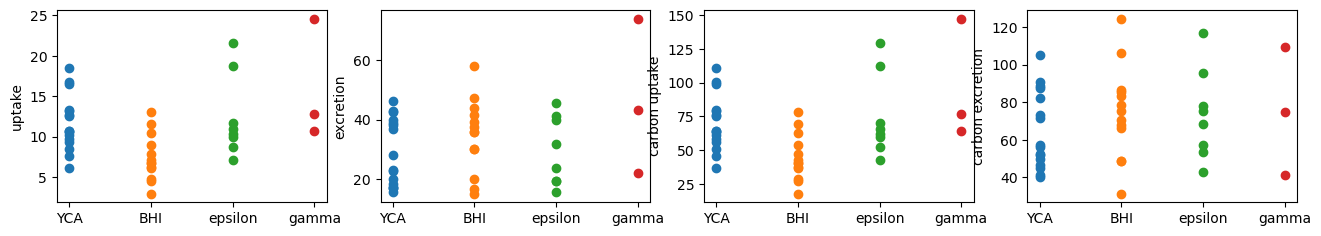

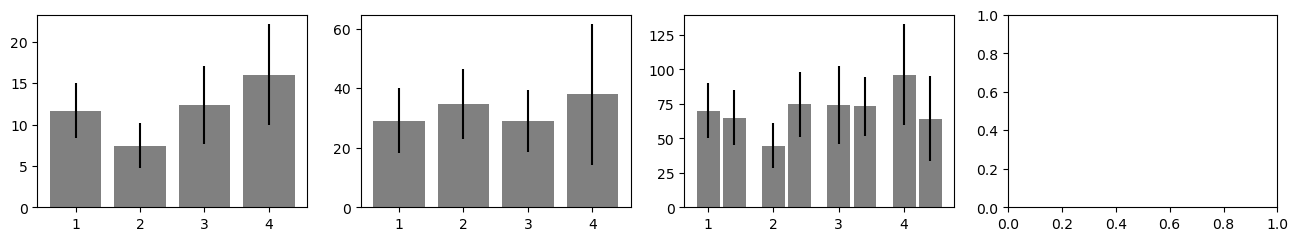

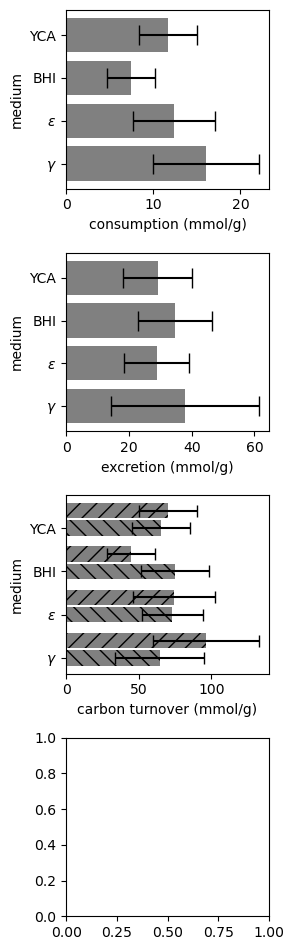

In [6]:
# different media['BHI' 'YCA' 'epsilon plus' 'simple' 'epsilon' 'fecal']
conversionfactor=1/(0.5) #multiply by OD ml/0.5mg to change unti from mM to:   ml mM / mg which is l mM / g which is mmol/g

num_plots=4 #uptake, secetion, different SCFA
fig, ax = plt.subplots(1,num_plots,figsize=(4*num_plots,2.5))
fig2, ax2 = plt.subplots(1,num_plots,figsize=(4*num_plots,2.5)) #bar plots of mean and stdev
fig3, ax3 = plt.subplots(num_plots,1,figsize=(3.,2.4*num_plots)) #bar plots of mean and stdev


conditionlist=[1,2,3,4]
xticklabels=[]
xticks=conditionlist

for cond in conditionlist:
    
    if cond==3: #plot average values for different strains
        
        condname="epsilon"
        exp_numberlist=samplenamelist[media.index("epsilon")][::-1]
    elif cond==4:
        condname="gamma"
        exp_numberlist=samplenamelist[media.index("gamma")][::-1]
    elif cond==2:
        condname="BHI"
        exp_numberlist=samplenamelist[media.index("BHI")][::-1]
    elif cond==1:
        condname="YCA"
        exp_numberlist=samplenamelist[media.index("YCA")][::-1]
    else:
        error
        
    # different media['BHI' 'YCA' 'epsilon plus' 'simple' 'epsilon' 'fecal']
    
    
    xticklabels.append(condname)
    print(condname)
    
    
    datacur=dataout_av.loc[dataout_av["exp_number"].isin(exp_numberlist)]
    datacur=datacur.set_index("exp_number")
    display(datacur)
    
    fontsize=14
    numexp=datacur.shape[0]
    
    
    
    
    strainl=[]
    strainllabelbar=[]
    consumptionl=[]
    excretionl=[]
    energycontentl=[]
    
                    
    excretion_singlel=np.zeros([len(exp_numberlist),8])
    strainlist2=[]
    iS = -1

    mean_ut=[]
    mean_excretion=[]
    mean_ut_c=[]
    mean_excretion_c=[]
    
    for index in exp_numberlist:
                iS = iS+1
                
                straincount=straincount+1
                
                ic = -1
                base=0
                basec=0
                baseut=0
                basecut=0
                energy=0
                
                strainl.append(datacur.at[index,"strain"])
                strainlist2.append(datacur.at[index,"strain"])
                strainllabelbar.append(datacur.at[index,"species"])#+" "+datacur.at[index,"strain"])
                mean_excretion_singlestrain=0
                mean_excretion_singlestrain_c=0
                mean_uptake_singlestrain=0
                mean_uptake_singlestrain_c=0
                consumpc=0
                for sub in sublist:
                    ic=ic+1
                    cfactor=cfactorlist[ic]
                    color=colorlist[ic]
                    if straincount==1:
                        label=sublistshort[ic]
                    else:
                        label=None
                    
                    if sub in ["glucose"]:# and (strainl[-1] not in ["DSM17677","ATCC27255"]):
                        consumpc=consumpc-1*datacur.at[index,sub]*conversionfactor
                        
                        if datacur.at[index,sub]<0:
                            basecut=basec-cfactor*datacur.at[index,sub]*conversionfactor
                            baseut=base-datacur.at[index,sub]*conversionfactor
                        mean_uptake_singlestrain=mean_uptake_singlestrain-conversionfactor*datacur.at[index,sub]
                        mean_uptake_singlestrain_c=mean_uptake_singlestrain_c-cfactor*conversionfactor*datacur.at[index,sub]
               
                        inverseyield=-1*baseut*0.18 #mmol/g bacteria *0.18 g glucose /mmol -> gram glucose/gram bacter
                        excretion_singlel[iS,ic] = -1*datacur.at[index,sub]*conversionfactor
                    
                    elif sub in ["maltose"]: #and (strainl[-1]  in ["DSM17677","ATCC27255"]):
                        consumpc=consumpc-2*datacur.at[index,sub]*conversionfactor
                        
                        mean_uptake_singlestrain=mean_uptake_singlestrain-conversionfactor*datacur.at[index,sub]
                        mean_uptake_singlestrain_c=mean_uptake_singlestrain_c-cfactor*conversionfactor*datacur.at[index,sub]
               
                        if datacur.at[index,sub]<0:
                            basecut=basec-cfactor*datacur.at[index,sub]*conversionfactor
                            baseut=base-datacur.at[index,sub]*conversionfactor
                        
                        inverseyield=-1*baseut*0.18 #mmol/g bacteria *0.18 g glucose /mmol -> gram glucose/gram bacter
                        excretion_singlel[iS,ic] = -1*datacur.at[index,sub]*conversionfactor
                    
                    
                    else:# datacur.at[index,sub]>0.5: #for other fermentation products, require more than 0.5
                        
                        basec=basec+cfactor*datacur.at[index,sub]*conversionfactor
                        base=base+datacur.at[index,sub]*conversionfactor
                        energy=energy+datacur.at[index,sub]*conversionfactor*energycontent[ic] #unit mmol/g *energycontent (unit kcal/mmol)
                        excretion_singlel[iS,ic] = datacur.at[index,sub]*conversionfactor
                        if datacur.at[index,sub]>0:
                            mean_excretion_singlestrain=mean_excretion_singlestrain+datacur.at[index,sub]*conversionfactor
                            mean_excretion_singlestrain_c=mean_excretion_singlestrain_c+datacur.at[index,sub]*conversionfactor*cfactor
                consumptionl.append(consumpc)
               
                
                
                #conversionfactor*datacur.at[index,"total_uptake"]*(-1),straincount,xerr=conversionfactor*datacur.at[index,"total_uptake_std"],color='k',capsize=10, elinewidth=2)
                #conversionfactor*datacur.at[index,"total_ferm"],straincount,xerr=conversionfactor*datacur.at[index,"total_ferm_std"],color='k', capsize=10, elinewidth=2)


        
                #ax[1].barh(straincount-0.2,-1*cfactor*datacur.at[index,sub]*conversionfactor,left=basecut,label=label,color=color,height=0.4,hatch='///')
                mean_excretion.append(mean_excretion_singlestrain) 
                mean_excretion_c.append(mean_excretion_singlestrain_c)    


    
    consumptionl=np.array(consumptionl)
    mean_excretion=np.array(mean_excretion)
    mean_excretion_c=np.array(mean_excretion_c)
    ax[0].scatter(consumptionl*0+cond,consumptionl)
    ax[1].scatter(consumptionl*0+cond,mean_excretion)
    ax[2].scatter(consumptionl*0+cond,np.array(consumptionl)*6) #carbon content
    ax[3].scatter(consumptionl*0+cond,mean_excretion_c)
    
    ax2[0].bar(cond,np.nanmean(consumptionl),yerr=np.nanstd(consumptionl),color='gray')
    ax2[1].bar(cond,np.nanmean(mean_excretion),yerr=np.nanstd(mean_excretion),color='gray')
    ax2[2].bar(cond,np.nanmean(consumptionl)*6,width=0.35,yerr=np.nanstd(consumptionl)*6,color='gray')
    ax2[2].bar(cond+0.4,np.nanmean(mean_excretion_c),width=0.35,yerr=np.nanstd(mean_excretion_c),color='gray')
    
    cond2=5-cond
    hatchconsumption="//"
    hatchexcretion="\\\\"
    colorbar='grey'
    cs=7
    
    cs2=4
    ax3[0].barh(cond2,np.nanmean(consumptionl),xerr=np.nanstd(consumptionl),color=colorbar,capsize=cs)#,hatch=hatchconsumption)
    ax3[1].barh(cond2,np.nanmean(mean_excretion),xerr=np.nanstd(mean_excretion),color=colorbar,capsize=cs)#,hatch=hatchexcretion)
    ax3[2].barh(cond2+0.4,np.nanmean(consumptionl)*6,height=0.35,xerr=np.nanstd(consumptionl)*6,color=colorbar,hatch=hatchconsumption,capsize=cs2)
    ax3[2].barh(cond2,np.nanmean(mean_excretion_c),height=0.35,xerr=np.nanstd(mean_excretion_c),color=colorbar,hatch=hatchexcretion,capsize=cs2)
    for i in [0,1,2]:
        ax3[i].set_yticks([1,2,3,4])
        ax3[i].set_yticklabels(["$\gamma$","$\epsilon$","BHI","YCA"])
        ax3[i].set_ylabel("medium")
    ax3[0].set_xlabel("consumption (mmol/g)")
    ax3[1].set_xlabel("excretion (mmol/g)")
    ax3[2].set_xlabel("carbon turnover (mmol/g)")
        
    #excretion
    
                #mean_ut.append(mean_uptake_singlestrain)
                #mean_ut_c.append(mean_uptake_singlestrain_c)
                #excretionl.append(base)
                #energycontentl.append(energy)
                #energy content
for i in range(0,num_plots):
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(xticklabels)

ax[0].set_ylabel("uptake")
ax[1].set_ylabel("excretion")
ax[2].set_ylabel("carbon uptake")
ax[3].set_ylabel("carbon excretion")
#ax[2].set_ylabel("uptake")
#ax[0].set_ylabel("uptake")

plt.tight_layout()
fig.savefig("plot_output_figure1/different_media.pdf")
fig3.savefig("plot_output_figure1/different_media_hbar.pdf")
plt.show()

In [7]:
OLD

NameError: name 'OLD' is not defined

In [ ]:
# #decide what to plot
####################

#use a table with average values  (to generate this table, run Final_analysis_hplcdata.ipynb
#dataout_av=pd.read_csv("data_hplc/analysis_out_av.csv")
#display(dataout_av.head())
#display(speciesinformation.head())

#speciesall=speciesinformation["species_HPLCname"]
#samplenamelist=[[],[],[],[]]
#for species in speciesall:
#    mc=-1
#    for medium in ["e","BHI","simple","YCA"]:
#            mc=mc+1
#            selectc=dataout_av.loc[(dataout_av["experiment_short"]=="av") & (dataout_av["species"]==species) & (dataout_av["medium"]==medium)]
            #print(selectc)
#            for il in range(0,selectc.shape[0]):
#                samplenamelist[mc].append(selectc["exp_number"].iloc[il])
#print("list output")
#for mc in range(0,len(samplenamelist)):
#    print(samplenamelist[mc])

####################
#plot concentration vs OD
####################

print(dataout_av["medium"].unique())
for medium in ['BHI','YCA','epsilon plus','simple','epsilon','fecal']:
    print(medium)
    display(dataout_av)
    select=dataout_av.loc[(dataout_av["use_in_study"]=="yes") & (dataout_av["experiment_short"]!="av") &  (dataout_av["medium"]==medium) ]
    display(select)

    select=select.sort_values(by=["strain"])

    strains=select["strain"].unique()
    num_strains=len(strains)

    if num_strains>0:
        #for index,row in select.iterrows():

        fontsize=12
        fig, ax = plt.subplots(num_strains,5,figsize=(5*4,3*num_strains))  #for barplots yields/excretion
        if num_strains==1:
            fig, ax = plt.subplots(2,5,figsize=(5*4,3*2))  #for barplots yields/excretion
        #print(index)
        #energycontent=np.array([0.68,0.21,0.37,.36,.33,0.52,0,0.33]) #kcal/mmol #the energy per mm for different fermentation products3


        markerlistgr=["8","P","D"]
        linestylegr=["-","--",":"]
        hatch=["//","\\\\","--"]
        #sublistshort=['glu','ace','pro','suc','lac','but','for','mal']
        #colorlist=['b','#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d']
        # sublist=['glucose','acetate','propionate','succinate','lactate','butyrate','formate']
        iS=-1
        for strain in strains:




            FPvalues=[]
            iS=iS+1
            results=[[],[],[],[],[],[],[],[]]

            select2=select.loc[select["strain"]==strain]

            specieslistcc=select2["species"].tolist()[0]


            print("********** Strain:")
            print(strain)
            #display(select2)

            gr=[]


            axTW=[]
            #go through all repeats of strains
            iA=-1
            for index,row in select2.iterrows():
                iA=iA+1

                #prepare plot
                if iA<3:
                    axTW.append(ax[iS,iA+2].twinx())
                    if strain in ["DSM17677","ATCC27255"]:
                        ax[iS,iA+2].set_ylabel("$\Delta $ maltose (mM)",fontsize=fontsize,color='b')
                    else:
                        ax[iS,iA+2].set_ylabel("$\Delta $ glucose (mM)",fontsize=fontsize,color='b')
                    axTW[iA].set_ylabel("$\Delta $ fermentation\n product (mM)",fontsize=fontsize)
                    ax[iS,iA+2].set_xlabel("bacterial density (OD600)",fontsize=fontsize)

                    #plot OD
                    gr.append(row["growth_rate"])

                    try:
                        odcc=row["growthcurve_OD"][1:-1].split(",")
                        timecc=row["growthcurve_time"][1:-1].split(",")
                        print(odcc)
                        print(timecc)
                        odcc=np.array(odcc,dtype=float)
                        timecc=np.array(timecc,dtype=float)

                        odcc = odcc[~np.isnan(timecc)]
                        timecc = timecc[~np.isnan(timecc)]
                        timecc = timecc[~np.isnan(odcc)]
                        odcc = odcc[~np.isnan(odcc)]

                        fitgr=np.polyfit(timecc,np.log(odcc),1)
                        odcc_range=np.linspace(0,np.nanmax(1.1*timecc),50)
                        ax[iS,1].plot(odcc_range,np.exp(odcc_range*fitgr[0]+fitgr[1]),ls=linestylegr[iA],label=iA+1,color="k",lw=1)
                        ax[iS,1].set_yscale("log")
                        ax[iS,1].minorticks_off()
                        ytickod=[0.04,0.08,0.16,0.32,0.64]
                        ax[iS,1].set_yticks(ytickod)
                        ax[iS,1].set_yticklabels(ytickod)
                        ax[iS,1].plot(timecc,odcc,ls='',marker=markerlistgr[iA],color='k',fillstyle="none")
                    except:
                        print("no growth rate data")


                #go through different substrates
                ic=-1
                for sub in sublist:
                    #print(sub)
                    ic=ic+1
                    cfactor=cfactorlist[ic]
                    color=colorlist[ic]
                    label=sublistshort[ic]
                    conversionfactor=1/0.5
                    #print("OD")
                    #print(row[sub+"_OD"])



                    #print(row[sub+"_conc"])
                    if row[sub+"_OD"] in ["nan",np.nan]:
                        pass
                    else:
                        odc=row[sub+"_OD"].replace("[","").replace("]","").replace("  "," ").replace("  "," ").strip().split(" ")
                        concc=row[sub+"_conc"].replace("[","").replace("]","").replace("  "," ").replace("  "," ").strip().split(" ")
                        odc=np.array(odc,dtype=float)
                        concc=np.array(concc,dtype=float)
                        odcval=np.linspace(0,1.1*np.nanmax(odc),10)
                        m=row[sub]
                        y0=row[sub+"_y0"]

                        if sub not in ["glucose","maltose"]:
                            FPvalues.append(np.nanmax(concc)-concc.min())

                        if iA<3:
                            #ax[iS,iA+2].set_title(row['species']+" "+row['strain']+"; "+row['medium']+"; exp: "+str(row['exp_number'])+" ("+str(row['exp_number_usedonly'])+")")
                            if sub in ["glucose","maltose"]: # and (strain not in ["DSM17677","ATCC27255"]):
                                ax[iS,iA+2].plot(odc,concc-concc.min(),color=color,ls='',marker=markerlist[ic],fillstyle="none")
                                ax[iS,iA+2].plot(odcval,odcval*m+y0-concc.min(),color=color,label=label,ls='--')
                                results[ic].append(-1*m)
                            #elif sub in ["glucose"] and (strain  in ["DSM17677","ATCC27255"]):
                            #    results[ic].append(np.nan)
                            #elif sub in ["maltose"] and (strain in ["DSM17677","ATCC27255"]):
                            #    ax[iS,iA+2].plot(odc,concc-concc.min(),color=color,ls='',marker=markerlist[ic],fillstyle="none")
                            #    ax[iS,iA+2].plot(odcval,odcval*m+y0-concc.min(),color=color,label=label,ls='--')
                            #    results[ic].append(-1*m)
                            #elif sub in ["maltose"] and (strain not in ["DSM17677","ATCC27255"]):
                            #    results[ic].append(np.nan)
                            else:
                                #if m>0.5:
                                    axTW[iA].plot(odc,concc-concc.min(),color=color,ls='',marker=markerlist[ic],fillstyle="none")
                                    axTW[iA].plot(odcval,odcval*m+y0-concc.min(),color=color,label=label,ls='-')
                                    results[ic].append(m)
                                #else:
                                #    results[ic].append(np.nan)
                            if ic==0:
                                ax[iS,iA+2].set_title("Replicate "+str(iA+1))


            ax[iS,1].legend(title="replicate")
            print(results)

            iA=-1
            for index,row in select2.iterrows():
                iA=iA+1
                if iA<3:
                    try:
                        axTW[iA].set_ylim(-.2,1.1*max(FPvalues))
                    except:
                        pass
                #if iA==0:
                #    ax[0].set_yticklabels(tickl[::-1],fontsize=fontsize)
            ic=-1
            for sub in sublist:
                #print(sub)
                ic=ic+1
                for iR in [0,1,2]:
                    #print(results)
                    try:
                        ax[iS,0].bar(ic+iR*0.3,results[ic][iR],width=0.25,color=colorlist[ic],hatch=hatch[iR])
                    except:
                        #ax[iS,0].bar(ic+iR*0.3,results[ic][iR],width=0.25,color=colorlist[ic])
                        pass
                    #ax[iS,0].bar(ic+iR*0.3,results[ic][iR]

            axGR=ax[iS,0].twinx()
            axGR.set_ylabel("growth rate (1/h)")
            for iR in [0,1,2]:
                    #print(results)
                    try:
                        axGR.bar(9+iR*0.3,gr[iR],width=0.25,color="gray",hatch=hatch[iR],label=iR+1)
                    except:
                        #ax[iS,0].bar(ic+iR*0.3,results[ic][iR],width=0.25,color=colorlist[ic])
                        pass
            #axGR.legend(title="replicate")
            ax[iS,0].set_xlim(-0.3,10)
            listxt=np.array(range(0,8))+0.3
            ax[iS,0].set_xticks(listxt.tolist()+[9])
            ax[iS,0].set_xticklabels(sublist+["growth\n rate"],rotation=45) # sublistshort
            ax[iS,0].set_ylabel("rate (mM/OD600)")

            axGR.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
                  ncol=3, fancybox=False, shadow=False,title="$"+specieslistcc.replace(".",". ")+"$"+"; replicates")

            #ax[iS,1].set_xlim(-0.3,8)
            #ax[iS,1].set_xticks(np.array(range(0,8))+0.3)
            #ax[iS,1].set_xticklabels(sublistshort)
            ax[iS,1].set_ylabel("bacterial density (OD600)")
            ax[iS,1].set_xlabel("time (h)")

        ax[0,0].legend()
        plt.tight_layout()
        fig.savefig("plot_output_figure1/summary_hplcresults"+medium+".pdf")
        plt.show()